#**DATA ANALYTICS PROJECTS**
##**Crash statistics**
---
Objective: using EDA to explore, attempt cleaning and analyzing data to give insight on number of crashes and people inujured in Victoria, typical reasons for or types of accident, road geometry or speed limit where these accidents occurs.

First, import basic data necessary for processing and visualising data.

In [ ]:
import pandas as pd # working with data
import matplotlib
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

## I. EXPLORING AND CLEANING DATA

Next, after having discover a dataset of road crash in Victoria from 2006 to 2020 from Victoria government data. read and understand the dataset and then import it in to our project.

Column in the dataset:
*   ACCIDENT_NO: the ID of each accident
*   ACCIDENTDATE: Date of the event            
*   ACCIDENTTIME: The time it occuered
* ACCIDENT_TYPE: Number assigned for different typical types of accidents (1=Collision with vehicle, 2=Struck pedestrian, 3=Struck animal, 4=Collision with a fixed object 5=Collision with some other object, 6=Vehicle overturned (no collision), 7=Fall from or in moving vehicle, 8=No collision and no object struck, 9=Other accident)
* Accident Type Desc: Type of Accident
* DAY_OF_WEEK: Number equivalent to each day in the week
* Day Week Description: the day of the week
* DCA_CODE: Number code for classifying the accident
* DCA Description: Different classes describe the accidents more detailed
* DIRECTORY: Indicates the street directory to give a map reference
* EDITION: the version of the directory  
* PAGE: the page number of the directory used to provide map reference
* GRID_REFERENCE_X: The grid reference in the x direction of the cell in the street directory used to provide a map reference for the accident.
* GRID_REFERENCE_Y: The grid reference in the y direction of the cell in the street directory used to provide a map reference for the accident.
* LIGHT_CONDITION: The level of brightness at the time of the accidents
* Light Condition Desc: escribe the light condition
* NODE_ID: Node ID of the incident
* NO_OF_VEHICLES: Number of vehicles involved
* NO_PERSONS: Total number of people involved
* NO_PERSONS_INJ_2: Number of people injured
* NO_PERSONS_INJ_3: Number of people injured
* NO_PERSONS_KILLED: Number of people you die from the accident
* NO_PERSONS_NOT_INJ: Number of people who was fine
* POLICE_ATTEND: Does the police attend
* ROAD_GEOMETRY: The layout of the road where the accident occured
* Road Geometry Desc: The description of the road geometry
* SEVERITY: Vicroads estimation of the accident (1 = Fatal, 2 = serious, 3 = other)
* SPEED_ZONE: The speed limit where the accident occured        


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.READING THE DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/ACCIDENT.csv')

<ipython-input-3-788786455478>:1: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data/ACCIDENT.csv')


In [ ]:
df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,4,0,1,0,3,1,2,T intersection,3,70
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,...,2,1,0,0,1,1,5,Not at intersection,2,100
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,2,1,0,0,1,1,2,T intersection,2,80
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,...,3,0,3,0,0,1,5,Not at intersection,3,50


In [ ]:
df.dtypes

ACCIDENT_NO             object
ACCIDENTDATE            object
ACCIDENTTIME            object
ACCIDENT_TYPE            int64
Accident Type Desc      object
DAY_OF_WEEK              int64
Day Week Description    object
DCA_CODE                 int64
DCA Description         object
DIRECTORY               object
EDITION                 object
PAGE                    object
GRID_REFERENCE_X        object
GRID_REFERENCE_Y        object
LIGHT_CONDITION          int64
Light Condition Desc    object
NODE_ID                  int64
NO_OF_VEHICLES           int64
NO_PERSONS               int64
NO_PERSONS_INJ_2         int64
NO_PERSONS_INJ_3         int64
NO_PERSONS_KILLED        int64
NO_PERSONS_NOT_INJ       int64
POLICE_ATTEND            int64
ROAD_GEOMETRY            int64
Road Geometry Desc      object
SEVERITY                 int64
SPEED_ZONE               int64
dtype: object

> Before we can start, we can see that many variables are not needed for our objective. We are to focus on the number and factors that might cause the accident and the variable below doesn't seems to contribute:
*   **DIRECTORY**
*   **EDITION**
*   **PAGE**
*   **GRID_REFERENCE_X**
*  **GRID_REFERENCE_Y**
*  **NODE_ID**
*  **POLICE_ATTEND**


> Hence, our next move would be removing these from the dataset

In [ ]:
lst = ['DIRECTORY','EDITION','PAGE','GRID_REFERENCE_X','GRID_REFERENCE_Y','NODE_ID', 'POLICE_ATTEND']
df = df.drop(lst, axis = 1)

> Next, we can see that there are a lot of pair of variables, 1 being the classification and the other being the description of the same variable like:
*  **ACCIDENT_TYPE** and **Accident Type Desc**
*  **DAY_OF_WEEK** and **Day week Description**
*  **DCA_CODE** and **DCA Description**
*  **LIGHT_CONDITION** and **Light condition Description**
*  **ROAD_GEOMETRY** and **Road Geometry Desc**

> Hence, we gonna only keep 1 per pair. In this case, let's keep the description data to make it easier for analysing or understanding any visuallisation in the later.

>However, in the case of DCA, since the description is quite long we will keep the **DCA_CODE** to make it easier while visualised. Instead, we will change it to a string value instead of integer value.


In [ ]:
lst_1 = ['ACCIDENT_TYPE','DAY_OF_WEEK','LIGHT_CONDITION','ROAD_GEOMETRY']
df = df.drop(lst_1, axis = 1)

df['DCA_CODE']= df['DCA_CODE'].astype('object')

we should also change **SEVERITY** into câtgorical date since it is also a classification variable

In [ ]:
df['SEVERITY']=df['SEVERITY'].astype('object')

Moreoer, there are 2 column for number of people injured in the dataset which might be for different cars since there might be more than 1 car in an accidents. However, in this analysis, we are only looking at the total number of this variable.

> Hence, we are going to combine the 2 variables into 1

In [ ]:
df['NO_PERSONS_INJ_2'] = df['NO_PERSONS_INJ_2'] + df['NO_PERSONS_INJ_3']
df = df.drop('NO_PERSONS_INJ_3', axis = 1)

We can also see that there might be other variable that might cause the accidents light weather or road condition. After research we can find some smaller dataset containing these variable.
> Hence we are going to import and merge these dataset with our original dataset

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/data/ATMOSPHERIC_COND.csv')
road_con = pd.read_csv('/content/drive/MyDrive/data/ROAD_SURFACE_COND.csv')

In [ ]:
print('weather dataset:','\n', weather.head())
print('\n','Road condition dataset:', road_con.head())

weather dataset: 
     ACCIDENT_NO  ATMOSPH_COND  ATMOSPH_COND_SEQ Atmosph Cond Desc
0  T20060000010             1                 1             Clear
1  T20060000018             1                 1             Clear
2  T20060000022             1                 1             Clear
3  T20060000023             1                 1             Clear
4  T20060000026             1                 1             Clear

 Road condition dataset:     ACCIDENT_NO  SURFACE_COND Surface Cond Desc  SURFACE_COND_SEQ
0  T20060000010             1               Dry                 1
1  T20060000018             1               Dry                 1
2  T20060000022             1               Dry                 1
3  T20060000023             1               Dry                 1
4  T20060000026             1               Dry                 1


> They both contain **ACCIDENT_NO** so we can just join these table through that variable

In [ ]:
df = pd.merge(df,weather,on = 'ACCIDENT_NO')
df = pd.merge(df,road_con,on = 'ACCIDENT_NO')

After all the work, now we can take a snapshot at our data

In [ ]:
df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,Accident Type Desc,Day Week Description,DCA_CODE,DCA Description,Light Condition Desc,NO_OF_VEHICLES,NO_PERSONS,...,NO_PERSONS_NOT_INJ,Road Geometry Desc,SEVERITY,SPEED_ZONE,ATMOSPH_COND,ATMOSPH_COND_SEQ,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc,SURFACE_COND_SEQ
0,T20060000010,13/01/2006,12:42:00,Collision with vehicle,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,...,5,Cross intersection,3,60,1,1,Clear,1,Dry,1
1,T20060000018,13/01/2006,19:10:00,Collision with vehicle,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,...,3,T intersection,3,70,1,1,Clear,1,Dry,1
2,T20060000022,14/01/2006,12:10:00,Fall from or in moving vehicle,Saturday,190,FELL IN/FROM VEHICLE,Day,1,2,...,1,Not at intersection,2,100,1,1,Clear,1,Dry,1
3,T20060000023,14/01/2006,11:49:00,Collision with vehicle,Saturday,130,REAR END(VEHICLES IN SAME LANE),Day,2,2,...,1,T intersection,2,80,1,1,Clear,1,Dry,1
4,T20060000026,14/01/2006,10:45:00,Collision with vehicle,Saturday,121,RIGHT THROUGH,Day,2,3,...,0,Not at intersection,3,50,1,1,Clear,1,Dry,1


In [ ]:
df.tail()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,Accident Type Desc,Day Week Description,DCA_CODE,DCA Description,Light Condition Desc,NO_OF_VEHICLES,NO_PERSONS,...,NO_PERSONS_NOT_INJ,Road Geometry Desc,SEVERITY,SPEED_ZONE,ATMOSPH_COND,ATMOSPH_COND_SEQ,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc,SURFACE_COND_SEQ
208471,T20200019239,1/11/2020,12:11:00,Collision with vehicle,Sunday,142,LEAVING PARKING,Day,2,4,...,3,Not at intersection,2,50,1,0,Clear,1,Dry,0
208472,T20200019247,1/11/2020,15:30:00,Collision with a fixed object,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Day,1,2,...,0,Not at intersection,2,999,1,1,Clear,1,Dry,1
208473,T20200019250,1/11/2020,18:00:00,Collision with vehicle,Sunday,116,LEFT NEAR (INTERSECTIONS ONLY),Day,2,2,...,1,Cross intersection,2,60,1,0,Clear,1,Dry,0
208474,T20200019253,1/11/2020,12:00:00,Vehicle overturned (no collision),Sunday,180,OFF CARRIAGEWAY ON RIGHT BEND,Day,1,1,...,0,Not at intersection,2,80,1,1,Clear,1,Dry,1
208475,T20200019417,4/11/2020,01:30:00,Collision with a fixed object,Wednesday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Dark Street lights on,1,1,...,0,Not at intersection,2,80,1,0,Clear,1,Dry,0


> After joining 2 tables in, we need to understand the meaning of new variables:
*  **ATMOSPH_COND**: Classify code for atmospheric condition (1=Clear, 2=Raining, 3=Snowing, 4=Fog, 5=Smoke, 6=Dust, 7=Strong winds, 9=Not known)
*  **ATMOSPH_COND_SEQ**: Show if there are multible conditions reported for the same accidents
*  **Atmosph Cond Desc**: The atmospheric condition
*  **SURFACE_COND**: The road surface condition
*  **Surface Cond Desc**: Classify code for road surface condition (1=Dry, 2=Wet, 3=Muddy, 4=Snowy, 5=Icy, 9=Unknown)
*  **SURFACE_COND_SEQ**: Show if multibles conditions were reported

> We can see the same problem here as we did with our original data so we can drop the classified variable to make our data simpler to analyze

In [ ]:
lst_2 = ['ATMOSPH_COND','SURFACE_COND']
df = df.drop(lst_2, axis = 1)

> 1 more problem is that the column name is quite long a bit complicated so to make the process of coding and analysing easier we are going to change them to make them easier to use with a more consistent format

In [ ]:
df.rename(columns ={'ACCIDENT_NO':'acc_id', 'ACCIDENTDATE':'date', 'ACCIDENTTIME':'time',
                     'Accident Type Desc':'type', 'Day Week Description': 'dayofweek','DCA Description':'DCA',
                     'Light Condition Desc':'Brightness', 'NO_OF_VEHICLES':'vehicle_no','NO_PERSONS':'person_no',
                     'NO_PERSONS_INJ_2':'injured_no','NO_PERSONS_KILLED':'death','NO_PERSONS_NOT_INJ':'uninjured_no',
                     'Road Geometry Desc':'road_layout', 'Atmosph Cond Desc':'Atmosphere','Surface Cond Desc':'road_condition'}, inplace= True)

Now we can start checking basic information of this dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208476 entries, 0 to 208475
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   acc_id            208476 non-null  object
 1   date              208476 non-null  object
 2   time              208476 non-null  object
 3   type              208476 non-null  object
 4   dayofweek         208476 non-null  object
 5   DCA_CODE          208476 non-null  object
 6   DCA               208476 non-null  object
 7   Brightness        208476 non-null  object
 8   vehicle_no        208476 non-null  int64 
 9   person_no         208476 non-null  int64 
 10  injured_no        208476 non-null  int64 
 11  death             208476 non-null  int64 
 12  uninjured_no      208476 non-null  int64 
 13  road_layout       208476 non-null  object
 14  SEVERITY          208476 non-null  object
 15  SPEED_ZONE        208476 non-null  int64 
 16  ATMOSPH_COND_SEQ  208476 non-null  int

In [ ]:
df.isnull().sum()

acc_id              0
date                0
time                0
type                0
dayofweek           0
DCA_CODE            0
DCA                 0
Brightness          0
vehicle_no          0
person_no           0
injured_no          0
death               0
uninjured_no        0
road_layout         0
SEVERITY            0
SPEED_ZONE          0
ATMOSPH_COND_SEQ    0
Atmosphere          0
road_condition      0
SURFACE_COND_SEQ    0
dtype: int64

> We can see our final dataset includes 19 columns (variables) and 208476 entries with both categorical and numerical data

In [ ]:
df.duplicated().sum()

0

> Through the outputs above, we can see that the data has neiher missing values nor duplicates records.

> **date** and **time** are currently object data which we will have to change later.

Since the data have both types, we will need to divide them to easier analyse them later. However, before that, we might just need to change the **date** and **time** variable data type and we only need to keep them in 1 column.

In [ ]:
df['date'] = df['date'] + ' ' + df['time']
df['date'] = df['date'].astype('datetime64')

In [ ]:
df = df.drop('time', axis = 1)

In [ ]:
df['date'].dtypes

dtype('<M8[ns]')

> From this, we see that the data type appear to be '<M8[ns]' instead of 'datetime64[ns]' which is strange but we will perform a logic comparision just to double check on this problem

In [ ]:
import numpy as np
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

> It can be see that they are actually the same type of data hence we can continue to work on our data.

Now, let's start inspect some of the data statistic

In [ ]:
df.describe()

,vehicle_no,person_no,injured_no,death,uninjured_no,SPEED_ZONE,ATMOSPH_COND_SEQ,SURFACE_COND_SEQ
count,208476.000000,208476.000000,208476.000000,208476.000000,208476.000000,208476.000000,208476.000000,208476.000000
mean,1.787050,2.404684,1.263244,0.019820,1.121352,122.293521,0.881655,0.872004
std,0.751603,1.506198,0.720712,0.155363,1.316948,216.843975,0.367776,0.352760
min,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,60.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,1.000000,60.000000,1.000000,1.000000
75%,2.000000,3.000000,1.000000,0.000000,1.000000,80.000000,1.000000,1.000000
max,21.000000,97.000000,45.000000,11.000000,87.000000,999.000000,4.000000,3.000000


> These value show some important information for the numerical data like min, max and mean. These will potentially be use later when we analyse these variable.

Let's check out the categorical ones as well

In [ ]:
df.describe(include ='object')

,acc_id,type,dayofweek,DCA_CODE,DCA,Brightness,road_layout,SEVERITY,Atmosphere,road_condition
count,208476,208476,208476,208476,208476,208476,208476,208476,208476,208476
unique,203708,9,7,81,81,7,9,4,8,6
top,T20100035639,Collision with vehicle,Friday,130,REAR END(VEHICLES IN SAME LANE),Day,Not at intersection,3,Clear,Dry
freq,6,128529,32969,32784,32784,139431,106598,134509,164712,161751


> These output have showed that most of the accident happens somewwhere not at the intersection, during day time, on a friday, with clear sky and dry road surface   

Now due to having **type** and **DCA** which are the two main variable that categorised each accident, we can group the data base on these 2 variables since only **DCA** would make the data ambiguous and doesn't fully show the description of the accidents.

Morover, for the grouping to make sense, we only need **acc_id**

In [ ]:
df.groupby(['type','DCA']).count()

acc_id  \
type                             DCA                                                          
Collision with a fixed object    LANE CHANGE LEFT (NOT OVERTAKING)                        4   
                                 LANE CHANGE RIGHT (NOT OVERTAKING)                       2   
                                 LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES)   ...       2   
                                 LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE...   13050   
                                 OFF CARRIAGEWAY TO LEFT                                  1   
...                                                                                     ...   
collision with some other object RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...      78   
                                 STRUCK OBJECT ON CARRIAGEWAY                          1382   
                                 STRUCK RAILWAY CROSSING FURNITURE                        2   
                                 TEMPORARY ROADWORKS                                     78   
                                 UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS ...      12   

                                                                                      date  \
type                             DCA                                                         
Collision with a fixed object    LANE CHANGE LEFT (NOT OVERTAKING)                       4   
                                 LANE CHANGE RIGHT (NOT OVERTAKING)                      2   
                                 LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES)   ...      2   
                                 LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE...  13050   
                                 OFF CARRIAGEWAY TO LEFT                                 1   
...                                                                                    ...   
collision with some other object RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...     78   
                                 STRUCK OBJECT ON CARRIAGEWAY                         1382   
                                 STRUCK RAILWAY CROSSING FURNITURE                       2   
                                 TEMPORARY ROADWORKS                                    78   
                                 UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS ...     12   

                                                                                     dayofweek  \
type                             DCA                                                             
Collision with a fixed object    LANE CHANGE LEFT (NOT OVERTAKING)                           4   
                                 LANE CHANGE RIGHT (NOT OVERTAKING)                          2   
                                 LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES)   ...          2   
                                 LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE...      13050   
                                 OFF CARRIAGEWAY TO LEFT                                     1   
...                                                                                        ...   
collision with some other object RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...         78   
                                 STRUCK OBJECT ON CARRIAGEWAY                             1382   
                                 STRUCK RAILWAY CROSSING FURNITURE                           2   
                                 TEMPORARY ROADWORKS                                        78   
                                 UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS ...         12   

                                                                                     DCA_CODE  \
type                             DCA                                                            
Collision with a fixed object    LANE CHANGE LEFT (NOT OVERTAKING)                          4   
                                 LANE CHANGE RIGHT (NOT OVER

First, we start on dividing the variable into 2 main types, categorical and numerical

Now we should divided these variable in to categorical and numerical data. We will be creating 2 different lists containing each type.  

In [ ]:
# Categorical
categorical = [i for i in df.columns if df[i].dtypes == 'object']
# Numerical
numeric = [i for i in df.columns if i not in categorical]

print('Categorical variables:',categorical, '\n','Numerical variables:', numeric)

Categorical variables: ['acc_id', 'type', 'dayofweek', 'DCA_CODE', 'DCA', 'Brightness', 'road_layout', 'SEVERITY', 'Atmosphere', 'road_condition'] 
 Numerical variables: ['date', 'vehicle_no', 'person_no', 'injured_no', 'death', 'uninjured_no', 'SPEED_ZONE', 'ATMOSPH_COND_SEQ', 'SURFACE_COND_SEQ']


> We can see that **acc_id** will mostly be unique and only a small amount will appear multiple time since the appearance of **ATMOSPH_COND_SEQ ** and **SURFACE_COND_SEQ** which show if there are multiple conditions reported for each accidents. Considering the size of our data, we can leave it out of most of our coding process

Now, let's looking more into the categorical ones


### 2.CATEGORICAL DATA

In [ ]:
df_cate = df[categorical].drop('acc_id', axis = 1)

for x in df_cate.columns:
  print(x, ':', list(sorted(df_cate[x].unique())))

type : ['Collision with a fixed object', 'Collision with vehicle', 'Fall from or in moving vehicle', 'No collision and no object struck', 'Other accident', 'Struck Pedestrian', 'Struck animal', 'Vehicle overturned (no collision)', 'collision with some other object']
dayofweek : ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
DCA_CODE : [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 179, 180, 181, 182, 183, 184, 189, 190, 191, 192, 193, 194, 198, 199]
DCA : ['ACCIDENT OR BROKEN DOWN                   ', 'ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DCAs 100-108.  ', 'CROSS TRAFFIC(INTERSECTIONS ONLY)              ', 'CUTTING IN (OVERTAKING)                   ', 'DOUBLE PARK

> From the output, there are a few things to be notice:
*  **Brightness**, **road_layout** and **road_condition** all have an 'Unknown' value that we will need to keep in mind while analyzing later.
*  **Atmosphere** also have a similar value 'Not known'.
*  **Brightness** have a 'Dark Street lights unknown' which also need more attention.
*  **SEVERITY** have more unique values than the data description

Let's look into these 'unknown' or similar values deeper

<function matplotlib.pyplot.show(close=None, block=None)>

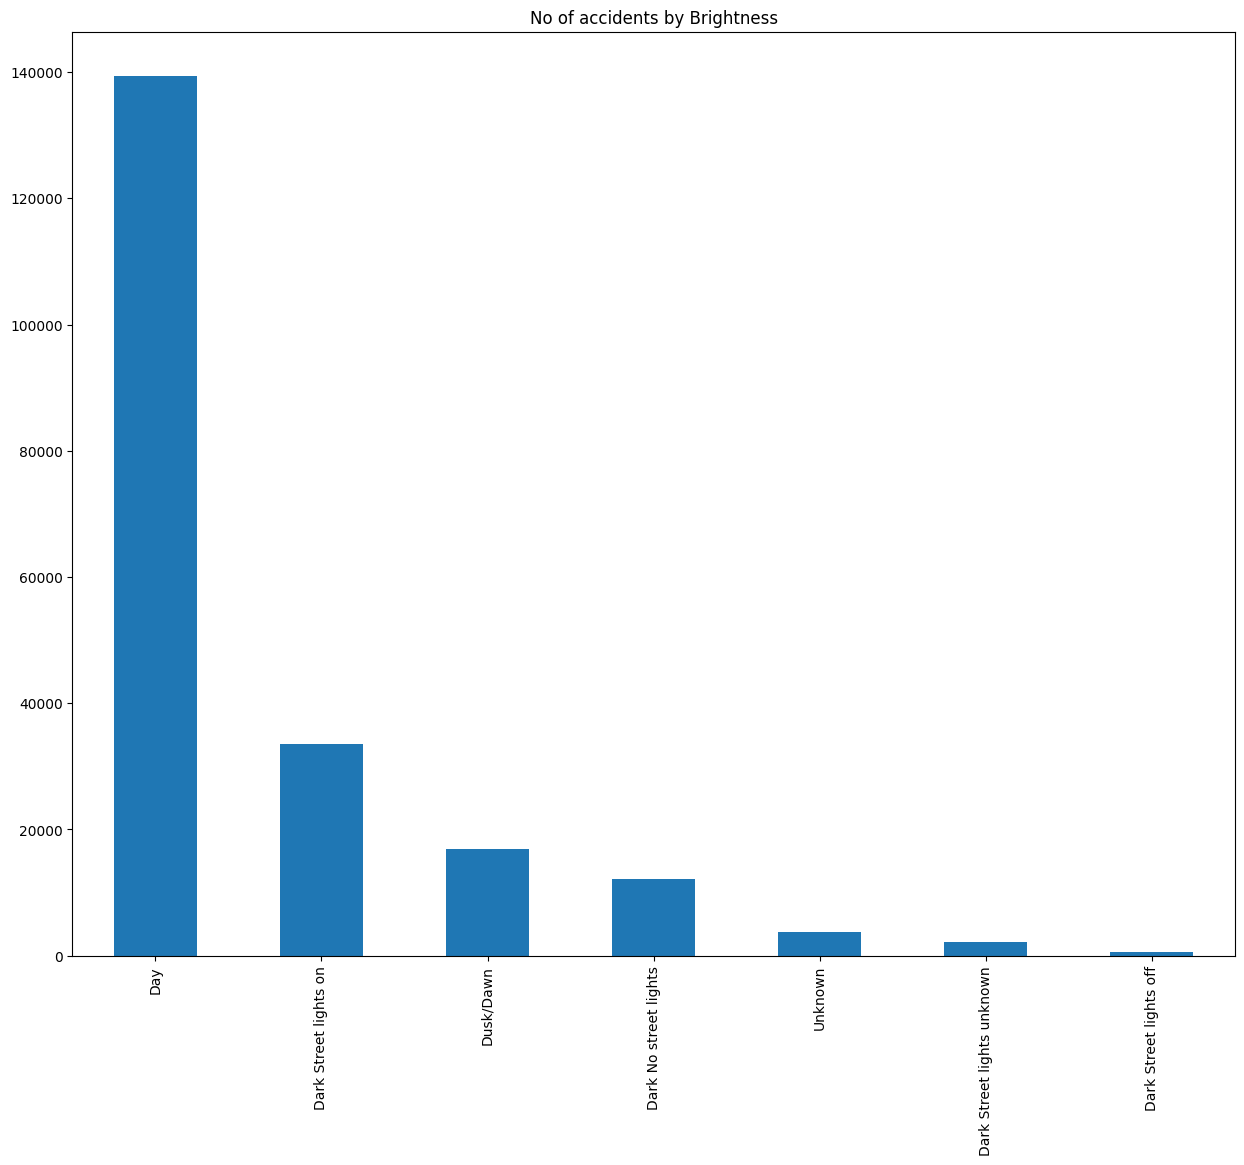

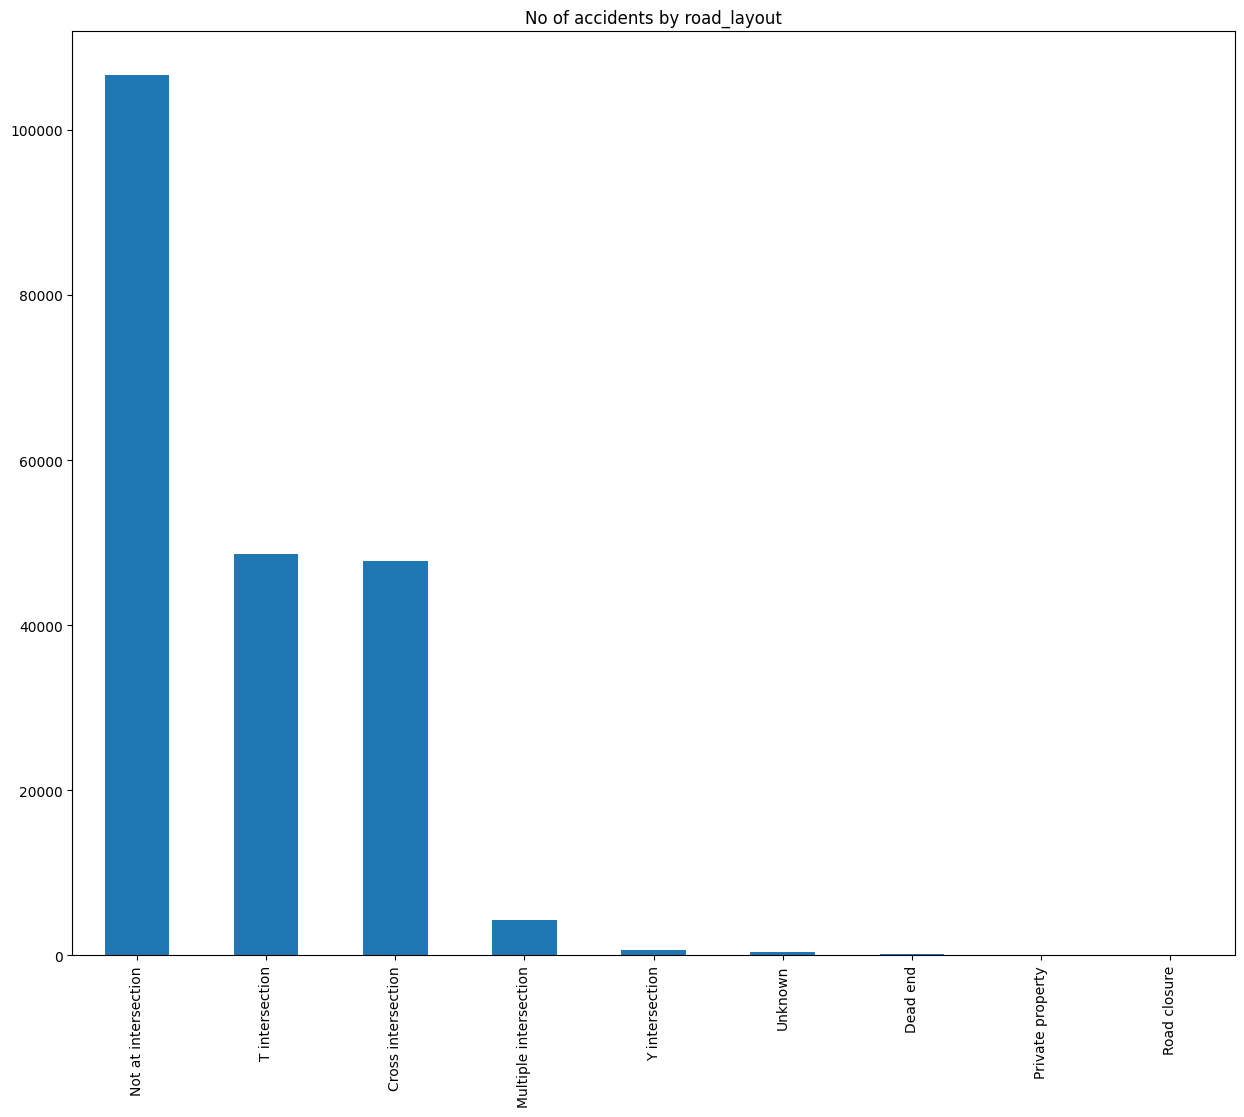

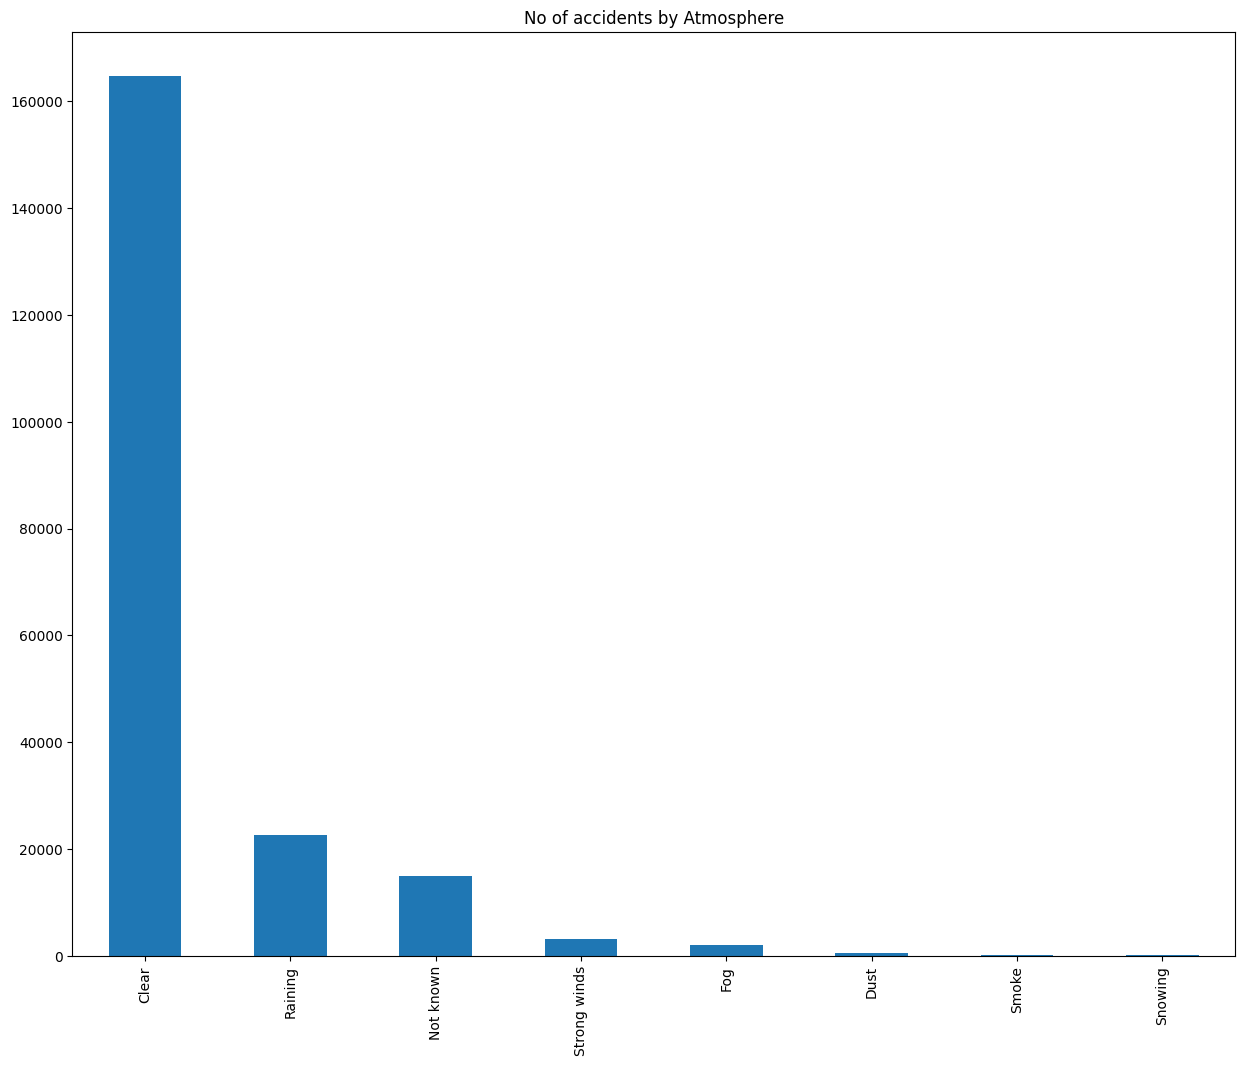

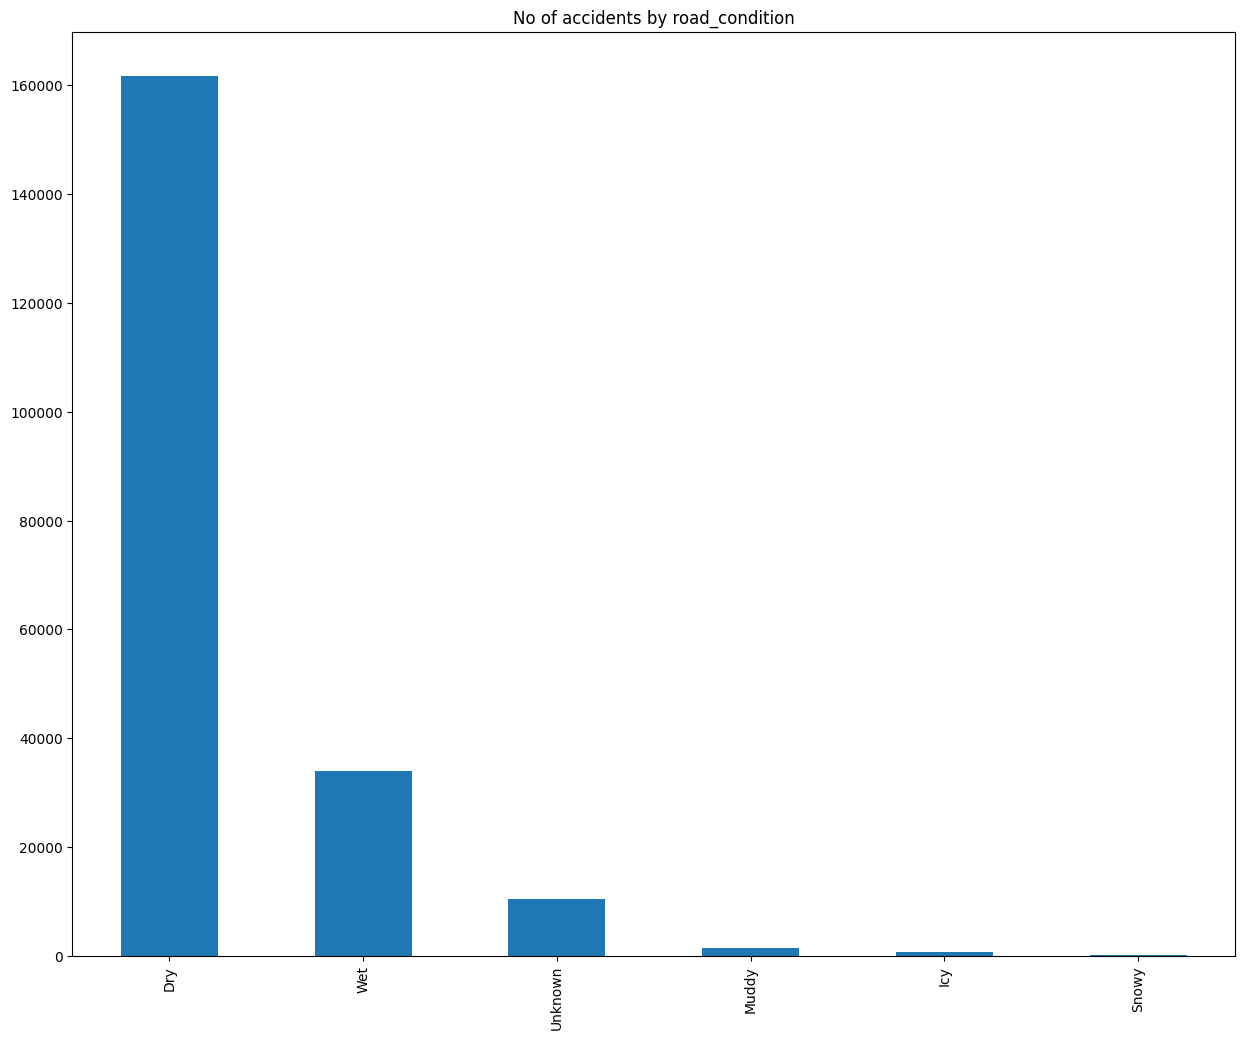

In [ ]:
unk_var = ['Brightness','road_layout','Atmosphere','road_condition']

for i in unk_var:
  plt.figure(figsize=(15,12))
  df[i].value_counts().plot.bar()
  plt.title('No of accidents by'+' '+i)
plt.show


> From the output we can see that eventhough not being the least occured, all of the unknown value only take up a small amount of the total value.

In [ ]:
acc_unknown_brightness = df[df['Brightness'] == 'Unknown']
acc_nolight = df[df['Brightness'] == 'Dark Street lights unknown']
acc_unknown_layout = df[df['road_layout'] == 'Unknown']
acc_unknown_roadcond = df[df['road_condition'] == 'Unknown']
acc_unknown_weather = df[df['Atmosphere'] == 'Not known']

Unknown = (acc_unknown_brightness, acc_nolight, acc_unknown_layout, acc_unknown_roadcond, acc_unknown_weather)
for i in Unknown:
  print(i[unk_var].describe(),'\n')

       Brightness          road_layout Atmosphere road_condition
count        3727                 3727       3727           3727
unique          1                    7          7              6
top       Unknown  Not at intersection  Not known        Unknown
freq         3727                 1825       2650           2386 

                        Brightness          road_layout Atmosphere  \
count                         2099                 2099       2099   
unique                           1                    7          8   
top     Dark Street lights unknown  Not at intersection      Clear   
freq                          2099                 1089       1037   

       road_condition  
count            2099  
unique              6  
top               Dry  
freq             1086   

       Brightness road_layout Atmosphere road_condition
count         448         448        448            448
unique          7           1          5              6
top           Day     Unknown   

> From the output we see that:
*  Most of the records with *unknown* **Brightness** also don't have the **Atmosphere** and **road_condition** reported
* *Dark Street lights unknowm* and *Unknown* **road_layout** appear the least but does not have any other not clear values in other column
* **Atmosphere** and **road_condition** are the 2 variables with the most missing values and it happens at them same time for 7994 of the records  

> Realistically, we cannot fill these data with most frequent value or something similar. We will need to have many more variable like location or weather data on date of the accident that we might have to find from a nother dataset which is more work than needed

> Even though there are quite a big number of missing values, our dataset size is very large compare to these counts, and a lot of them are missing in the same accidents. Hence, it is safe to remove these records while still have keeping a big enough dataset to ensure the accuracy of the analysis

In [ ]:
df = df.drop(df[df['Brightness'] == 'Unknown'].index, axis=0)
df = df.drop(df[df['Brightness'] == 'Dark Street lights unknown'].index, axis=0)
df = df.drop(df[df['road_layout'] == 'Unknown'].index, axis=0)
df = df.drop(df[df['road_condition'] == 'Unknown'].index, axis=0)
df = df.drop(df[df['Atmosphere'] == 'Not known'].index,axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188500 entries, 0 to 208475
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acc_id            188500 non-null  object        
 1   date              188500 non-null  datetime64[ns]
 2   type              188500 non-null  object        
 3   dayofweek         188500 non-null  object        
 4   DCA_CODE          188500 non-null  object        
 5   DCA               188500 non-null  object        
 6   Brightness        188500 non-null  object        
 7   vehicle_no        188500 non-null  int64         
 8   person_no         188500 non-null  int64         
 9   injured_no        188500 non-null  int64         
 10  death             188500 non-null  int64         
 11  uninjured_no      188500 non-null  int64         
 12  road_layout       188500 non-null  object        
 13  SEVERITY          188500 non-null  object        
 14  SPEE

> After that, we are left with 188500 entries

Now, let's check on the records that have **SEVERITY** 4 which we know is out of range of **SEVERITY** in the description

In [ ]:
filter = df[df['SEVERITY'] == 4]
filter.head()


,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,ATMOSPH_COND_SEQ,Atmosphere,road_condition,SURFACE_COND_SEQ
4156,T20060014765,2006-04-19 15:00:00,Collision with vehicle,Wednesday,130,REAR END(VEHICLES IN SAME LANE),Day,2,2,0,0,2,Cross intersection,4,80,1,Clear,Dry,1
158472,T20160024048,2016-06-11 23:00:00,Vehicle overturned (no collision),Sunday,170,OFF CARRIAGEWAY TO LEFT,Dark Street lights on,1,2,0,0,2,Not at intersection,4,60,1,Clear,Dry,1
181865,T20180013533,2018-07-19 06:30:00,Struck Pedestrian,Thursday,100,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIG...,Dark Street lights on,1,3,0,0,1,T intersection,4,60,1,Clear,Dry,1


> There are only 3 of such records, so it is more efficient to remove them.

In [ ]:
df.drop(filter.index, axis = 0, inplace = True)

> Since there only 3 class with very short and clear description, we should replace the class with actual definition for convenience while analysing

In [ ]:
df['SEVERITY'] = df['SEVERITY'].replace([1,2,3],['Fatal', 'serious', 'other'])

Let's check our data again

In [ ]:
df.head(10)

,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,ATMOSPH_COND_SEQ,Atmosphere,road_condition,SURFACE_COND_SEQ
0,T20060000010,2006-01-13 12:42:00,Collision with vehicle,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,1,0,5,Cross intersection,other,60,1,Clear,Dry,1
1,T20060000018,2006-01-13 19:10:00,Collision with vehicle,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,1,0,3,T intersection,other,70,1,Clear,Dry,1
2,T20060000022,2006-01-14 12:10:00,Fall from or in moving vehicle,Saturday,190,FELL IN/FROM VEHICLE,Day,1,2,1,0,1,Not at intersection,serious,100,1,Clear,Dry,1
3,T20060000023,2006-01-14 11:49:00,Collision with vehicle,Saturday,130,REAR END(VEHICLES IN SAME LANE),Day,2,2,1,0,1,T intersection,serious,80,1,Clear,Dry,1
4,T20060000026,2006-01-14 10:45:00,Collision with vehicle,Saturday,121,RIGHT THROUGH,Day,2,3,3,0,0,Not at intersection,other,50,1,Clear,Dry,1
5,T20060000028,2006-01-14 16:15:00,Collision with vehicle,Saturday,116,LEFT NEAR (INTERSECTIONS ONLY),Day,2,2,1,0,1,Cross intersection,serious,100,1,Clear,Dry,1
6,T20060000035,2006-01-15 10:55:00,Collision with a fixed object,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Day,1,1,1,0,0,Not at intersection,serious,100,1,Clear,Dry,1
7,T20060000042,2006-01-15 22:00:00,Collision with a fixed object,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Dark Street lights on,1,1,1,0,0,Not at intersection,serious,70,1,Clear,Dry,1
8,T20060000044,2006-01-16 08:55:00,Collision with vehicle,Monday,140,U TURN,Day,3,5,4,0,1,T intersection,serious,80,1,Clear,Dry,1
9,T20060000046,2006-01-16 11:00:00,Struck Pedestrian,Monday,109,ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DC...,Day,1,2,1,0,1,Not at intersection,other,60,1,Clear,Dry,1


Now that we are done with categorical data, let's move on to numeric data



### 3.NUMERICAL DATA


We have already seen the statistic of these data. However the mean some value like `mean` and `std` appears to be float, and in the case of these variable, we can only have integer so let's roud them up and check again.

In [ ]:
round(df[numeric].describe())

,vehicle_no,person_no,injured_no,death,uninjured_no,SPEED_ZONE,ATMOSPH_COND_SEQ,SURFACE_COND_SEQ
count,188497.0,188497.0,188497.0,188497.0,188497.0,188497.0,188497.0,188497.0
mean,2.0,2.0,1.0,0.0,1.0,103.0,1.0,1.0
std,1.0,2.0,1.0,0.0,1.0,174.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0,30.0,0.0,0.0
25%,1.0,2.0,1.0,0.0,0.0,60.0,1.0,1.0
50%,2.0,2.0,1.0,0.0,1.0,60.0,1.0,1.0
75%,2.0,3.0,1.0,0.0,1.0,80.0,1.0,1.0
max,21.0,97.0,45.0,11.0,87.0,999.0,4.0,3.0


> Our data seems to have similar range except for **SPEED_ZONE**, which also have a very high max value we need to look into


> As mentioned before, the 2 variable **ATMOSPH_COND_SEQ** and **SURFACE_COND_SEQ** showw if there are multible conditions report for the same accidents. Let's first take a snapshot at those accidents



In [ ]:
cond = ['Atmosphere','road_condition']

dup_id = df[df.duplicated(subset=['acc_id'],keep = False)]
multi_cond = dup_id[cond].groupby(dup_id['date']).sum()
print(multi_cond[cond].drop_duplicates().head(10))


                                                         Atmosphere  \
date                                                                  
2006-01-01 14:30:00                               ClearStrong winds   
2006-01-02 15:40:00                                  RainingRaining   
2006-01-03 19:00:00                                      ClearClear   
2006-01-04 00:15:00                             RainingStrong winds   
2006-01-04 06:00:00                               ClearStrong winds   
2006-01-05 07:30:00                                      RainingFog   
2006-01-20 17:45:00  RainingRainingDustDustStrong windsStrong winds   
2006-01-22 09:30:00                                DustStrong winds   
2006-01-26 13:15:00                               SmokeStrong winds   
2006-02-05 09:00:00                                 ClearClearClear   

                               road_condition  
date                                           
2006-01-01 14:30:00                    DryDry  
200

In [ ]:
print(multi_cond[cond].drop_duplicates().tail(10))

                                       Atmosphere    road_condition
date                                                               
2017-10-20 18:00:00   ClearClearClearStrong winds    WetMuddyDryDry
2019-01-30 19:52:00  RainingSmokeDustStrong winds      WetWetWetWet
2019-07-15 05:39:00          RainingRainingFogFog      DryWetDryWet
2019-10-03 14:41:00                  RainingSmoke            DryDry
2020-01-15 17:07:00      RainingRainingSmokeSmoke  WetMuddyWetMuddy
2020-01-15 18:00:00         SmokeDustRainingSmoke      DryDryWetWet
2020-01-16 05:45:00                      FogSmoke            WetWet
2020-03-07 19:30:00      RainingFogRainingRaining      WetWetWetIcy
2020-05-01 13:02:00                     SmokeDust            WetWet
2020-12-07 11:50:00                    SnowingFog        SnowySnowy


> Looking at the snapshot of the combination of **Atmosphere** or **road_condition** are fairly reasonable and all seems like there are no mistake.

> However, since the amount of these case a quite large and we cannot check row by row to see if they are all valid, it would be more efficient to drop these records in our data and since that is the case we have no need for the 2 columns anymore.


In [ ]:
df.drop(dup_id.index, axis = 0, inplace = True)


In [ ]:
seq = ["ATMOSPH_COND_SEQ",'SURFACE_COND_SEQ']
df.drop(seq, axis = 1, inplace = True)

In [ ]:
(df['acc_id'].value_counts() > 1).sum()

0

Now let's check on the unusual values of **SPEED_ZONE**

<Axes: >

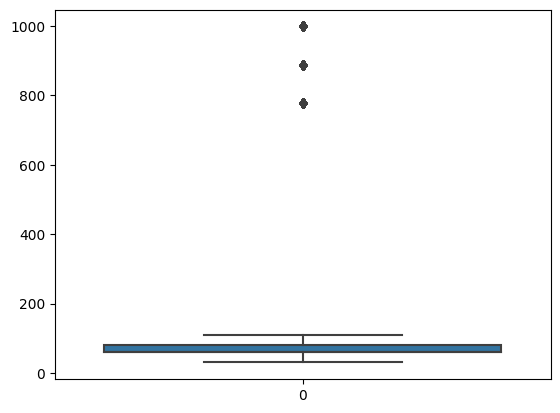

In [ ]:
sns.boxplot(data = df['SPEED_ZONE'])

> we can clearly see that there are 3 record of **SPEED_ZONE** that are unsually high. they will need to be remove, in this case, we will use the **interquantile method**  

Before we go ahead and do that, we are going to check the rest of the data as well

<Axes: >

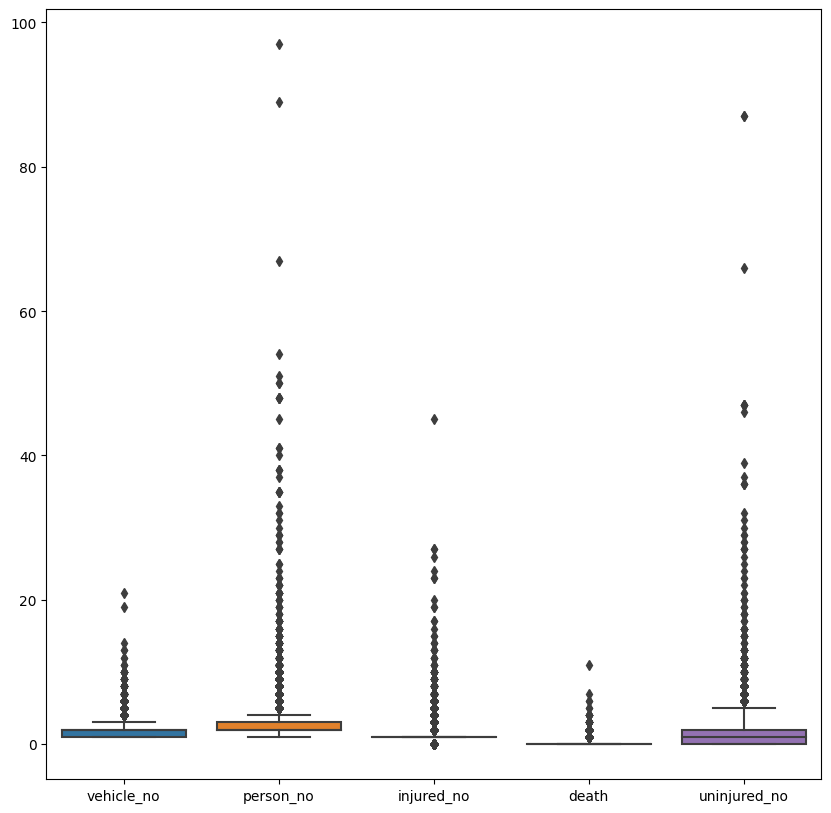

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df[numeric[:-3]])


>Besides **SPEED-ZONE**, all other variables like number of vehicles or people involved in an accident, they are clearly not error but just a result from a very severe accident that rarely happen. so they are realistic and can be used in our analyis.

> MMeanwwhile **SPEED-ZONE** should not have a max value of 999 and should have a reasonable limit. Hence, we go ahead with removing the outlier for **SPEED_ZONE**

In [ ]:
IQR = df['SPEED_ZONE'].quantile(0.75) - df['SPEED_ZONE'].quantile(0.25)
print(IQR)

20.0


In [ ]:
up_agl = round(df['SPEED_ZONE'].quantile(0.25) - 1.5*IQR, 3)
lo_agl = round(df['SPEED_ZONE'].quantile(0.75) + 1.5*IQR, 3)
print('Upper bound of is:', up_agl)
print('Lower bound of is:', lo_agl)

Upper bound of is: 30.0
Lower bound of is: 110.0


> Base on this, we can remove any speed zne that are lower than 30 or higher than 110, which seems very reasonable.

In [ ]:
df = df[~((df['SPEED_ZONE']<30)|(df['SPEED_ZONE']>110))]

In [ ]:
df['SPEED_ZONE'].describe()

count    173350.000000
mean         68.101904
std          18.192734
min          30.000000
25%          60.000000
50%          60.000000
75%          80.000000
max         110.000000
Name: SPEED_ZONE, dtype: float64

Now that we have finish exploring the dataset, the data looks like it's cleaned and ready for the next step.

## II. DATA ANALYSING


In this part, we are going to analyzed the data and answer some of the question:
*  what are the trends over the year? Any new findings?
*  How are the accidents distribute over month or day of week?
*  How are the number of accidents distribute over other variable? What can be seen from it?
*  How are the number of crashes by types change over years?

we are also open to new question or insight as we dig deeper in our data

### 1.ANALYSING CATEGORICAL DATA

In [ ]:
# Number of accident over years
yr = df['date'].dt.year
y = df['acc_id'].groupby(yr).count()

<function matplotlib.pyplot.show(close=None, block=None)>

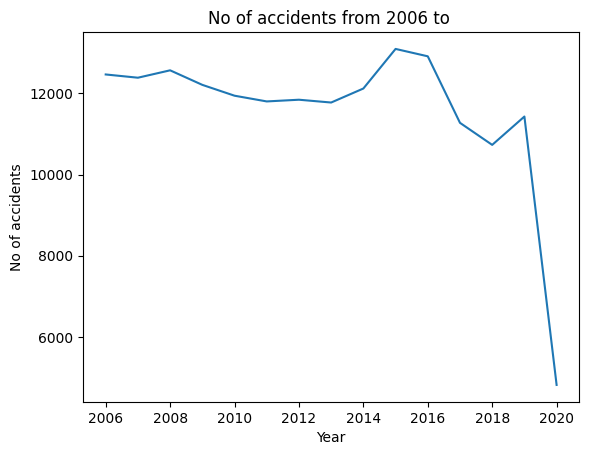

In [ ]:
sns.lineplot(data = y)
plt.title('No of accidents from 2006 to ')
plt.xlabel('Year')
plt.ylabel('No of accidents')
plt.show

> Some keys findings:
*  The number of accidents start with a high value of around 12500 and keep fluctuate between 12 to 14 thousands untill 2016
*  Towards 2017, the number drop below 12000 and continueto reduce to around 11700 in 2018
*  from 2018 to 2019, it starts to rise up again to above 12000 before a drastically drop to about 5000 in 2020

> the result of this sudden drop could be the appearence of COVID-19 which happen around late 2019 and continue to spread rapidly and widely over the next 2 years.

> One more reason contributing to this drop is that we also missing almost 2 months of records in 2020 in the dataset since the latest date in the data set is *4/11/2020*

> Unfortunately, the dataset has not been updated so we can not inspect data that are closer to the present time.

<function matplotlib.pyplot.show(close=None, block=None)>

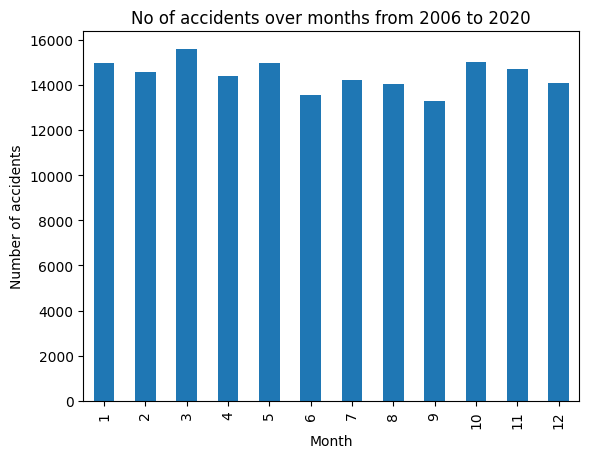

In [ ]:
month = df['date'].dt.month
y_m = df['acc_id'].groupby(month).count()

y_m.plot.bar()
plt.title('No of accidents over months from 2006 to 2020')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.show

> we can see that March has the highest number of accidents, following by January, May and October which have similar number of accidents.

Now we will plot bar chart for number of accidents by all the categorical data with their value and see if we can discover something more on this

<function matplotlib.pyplot.show(close=None, block=None)>

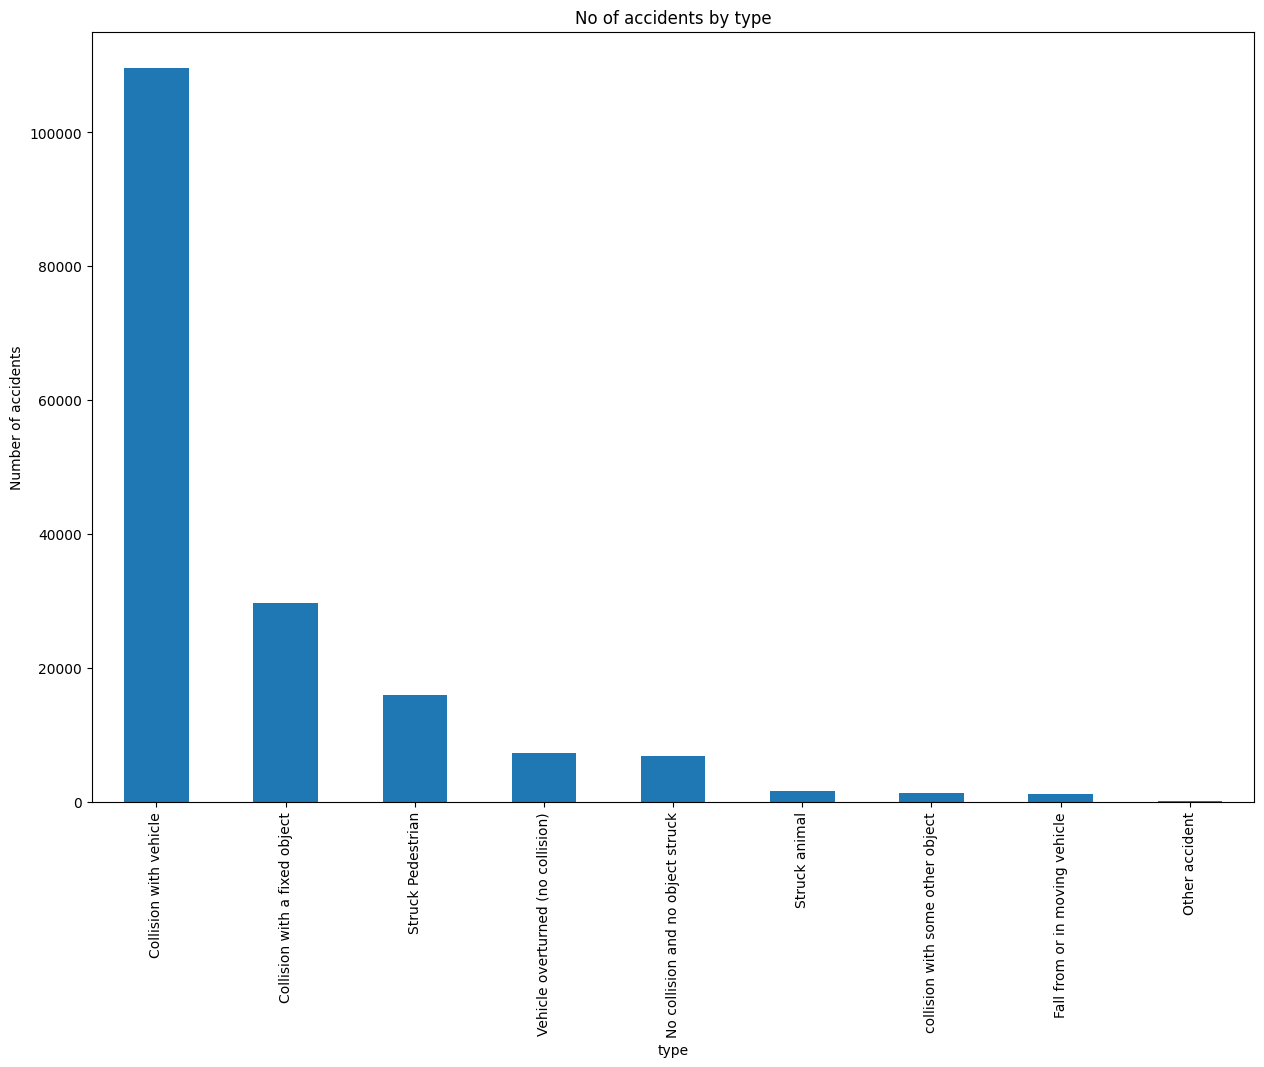

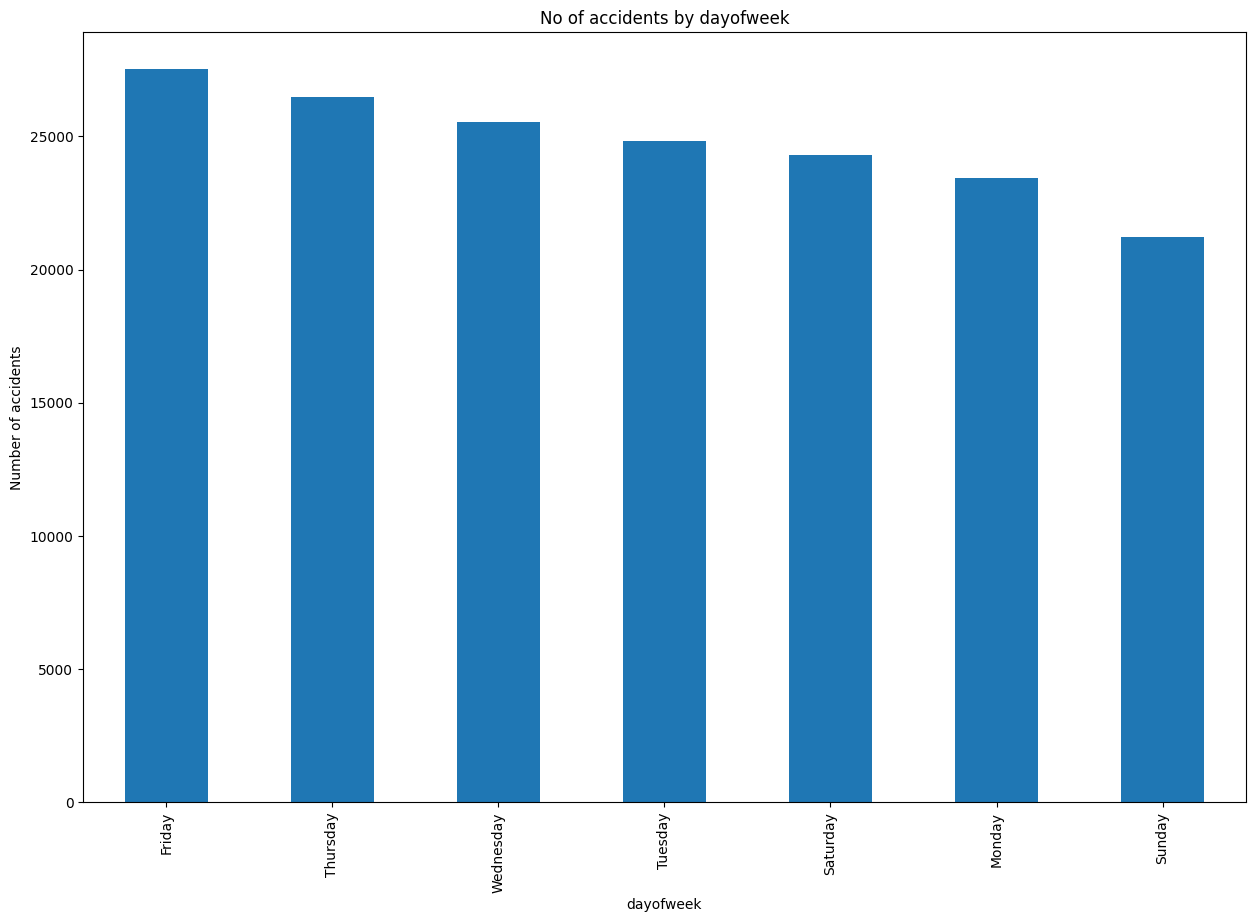

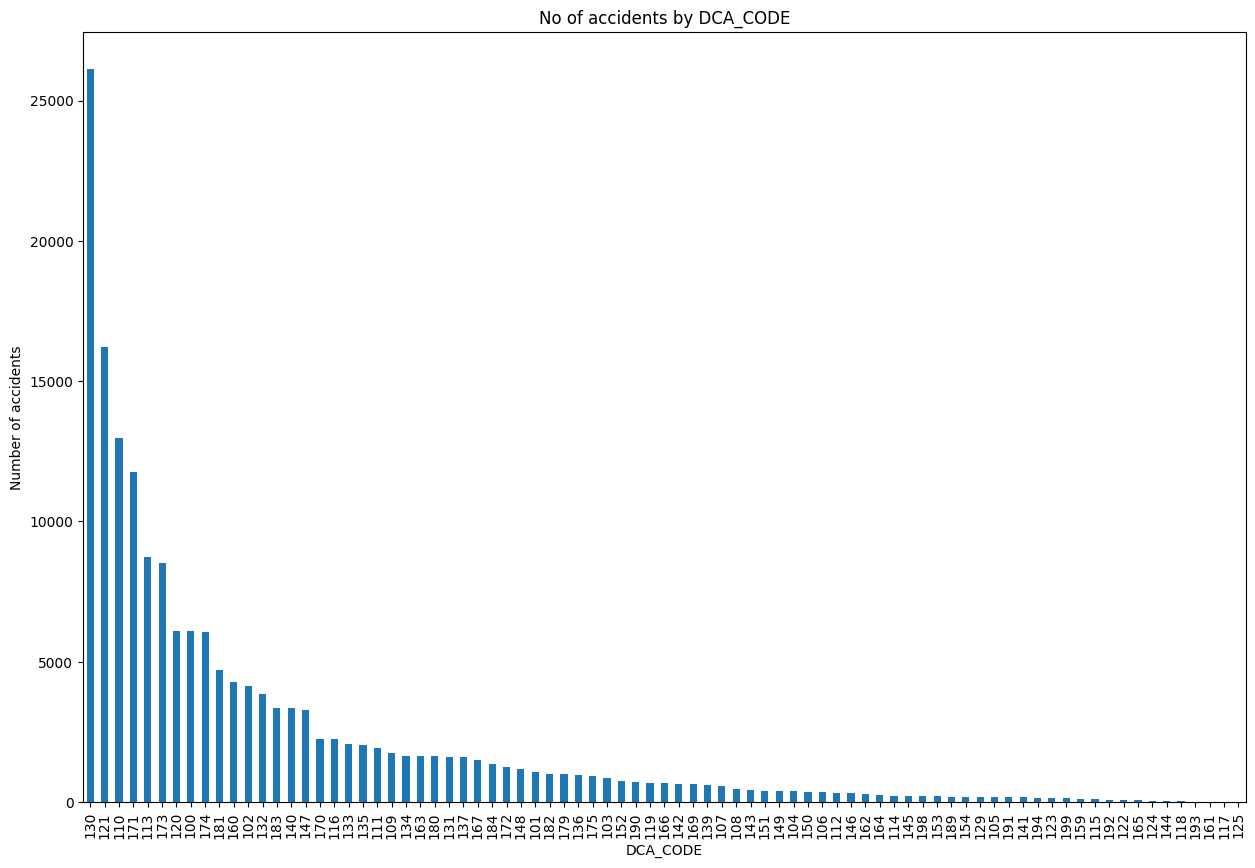

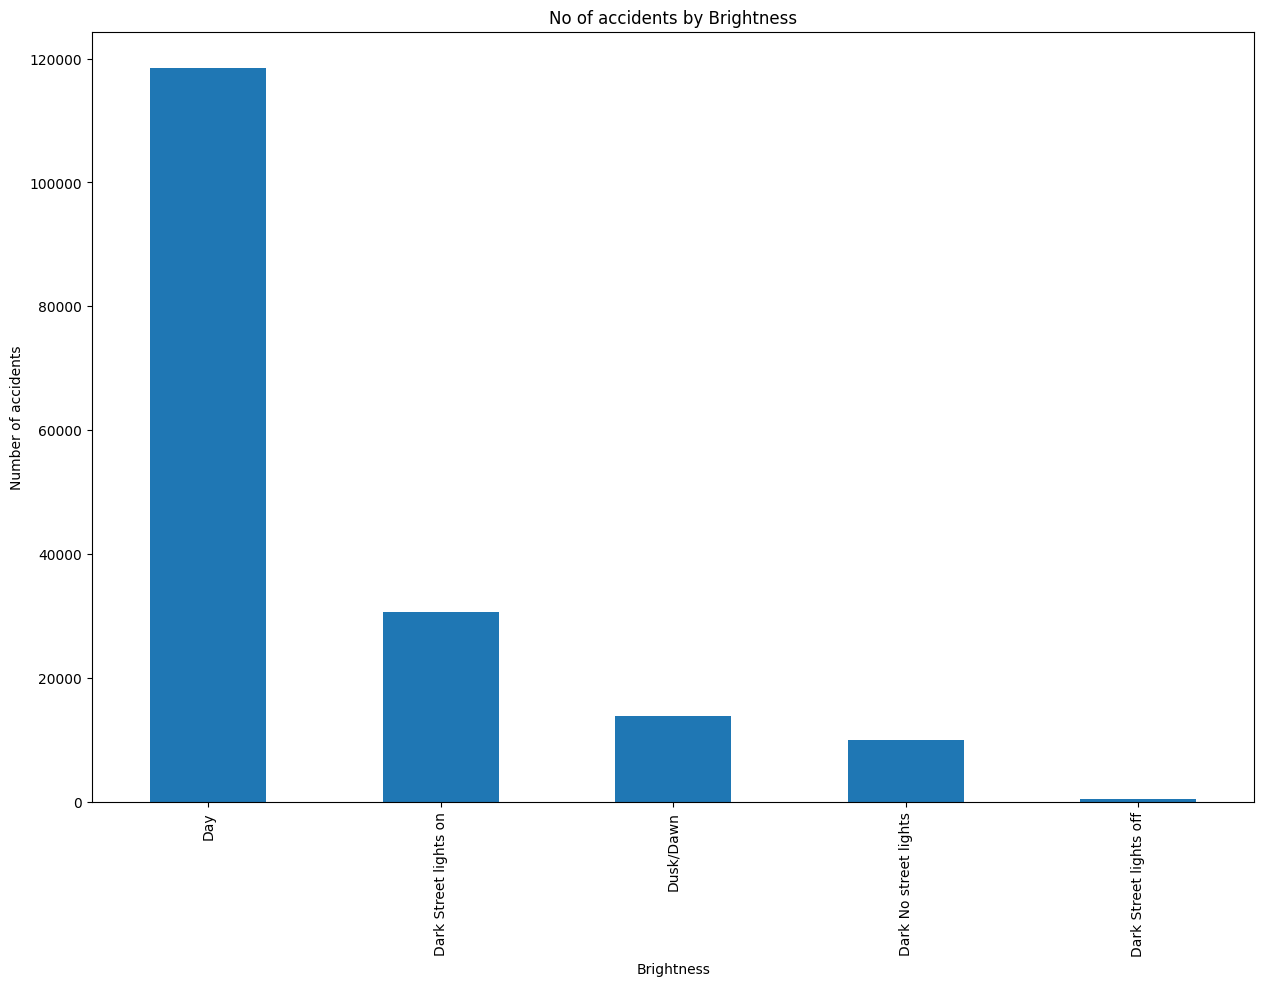

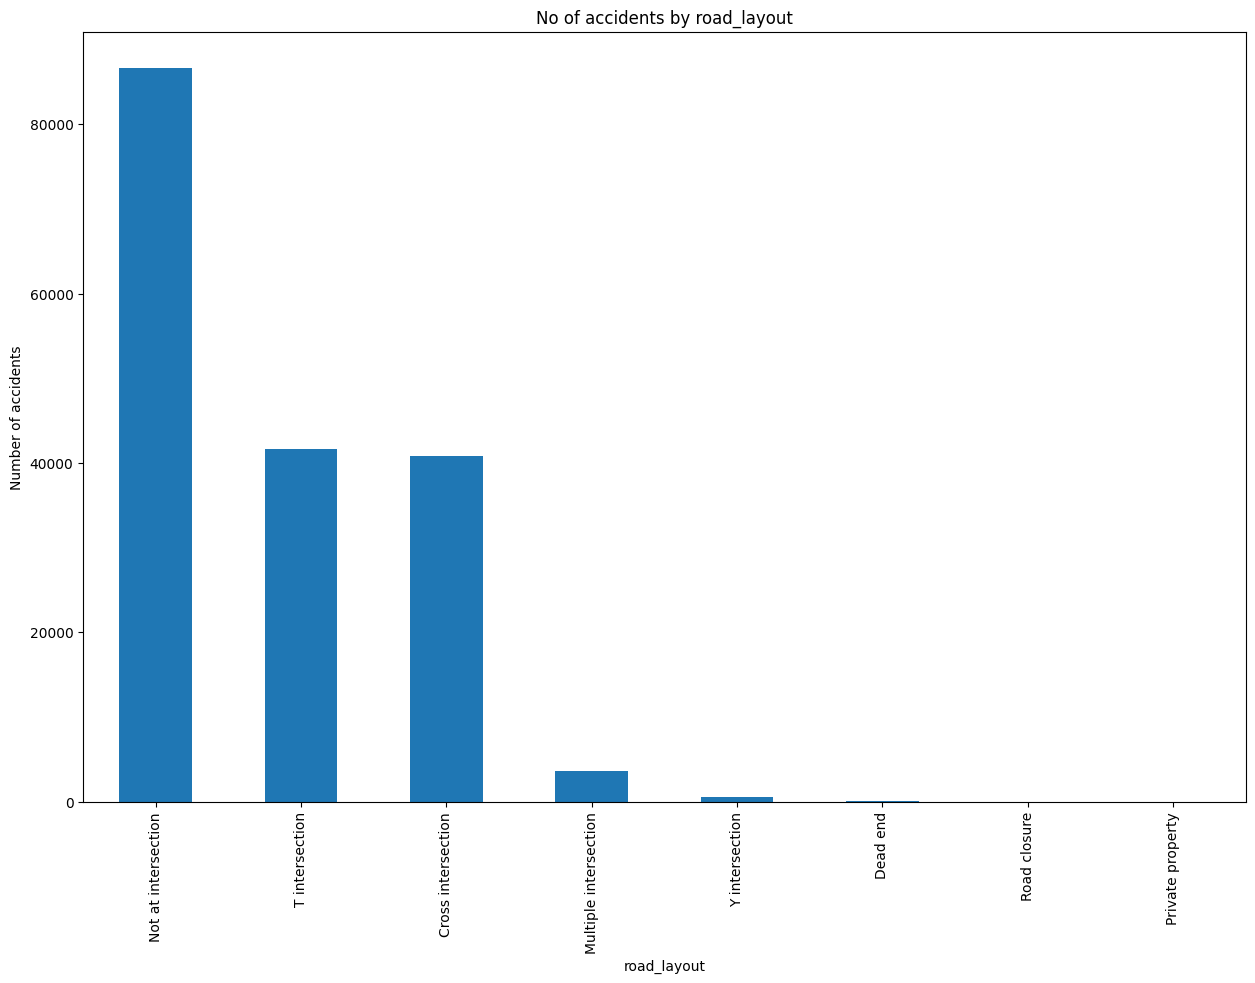

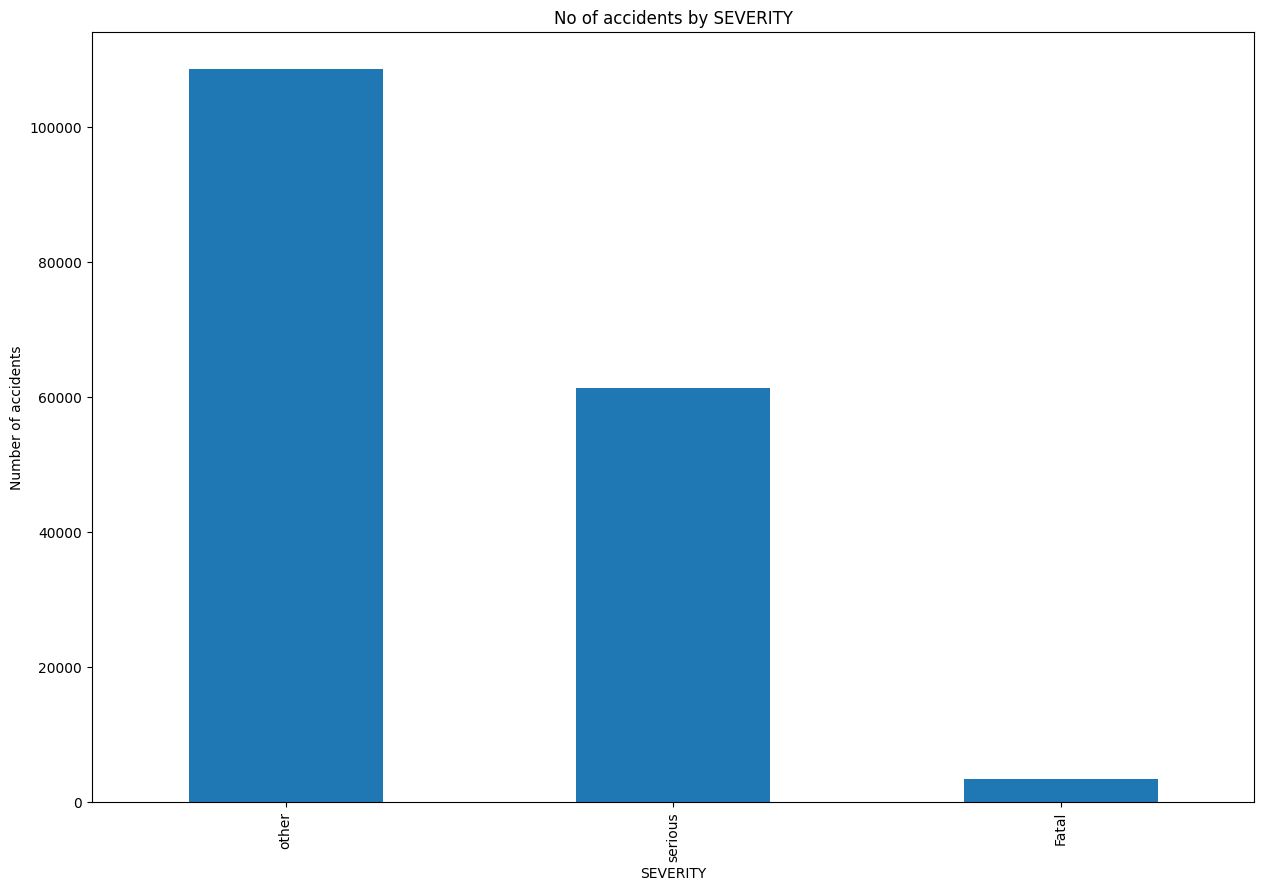

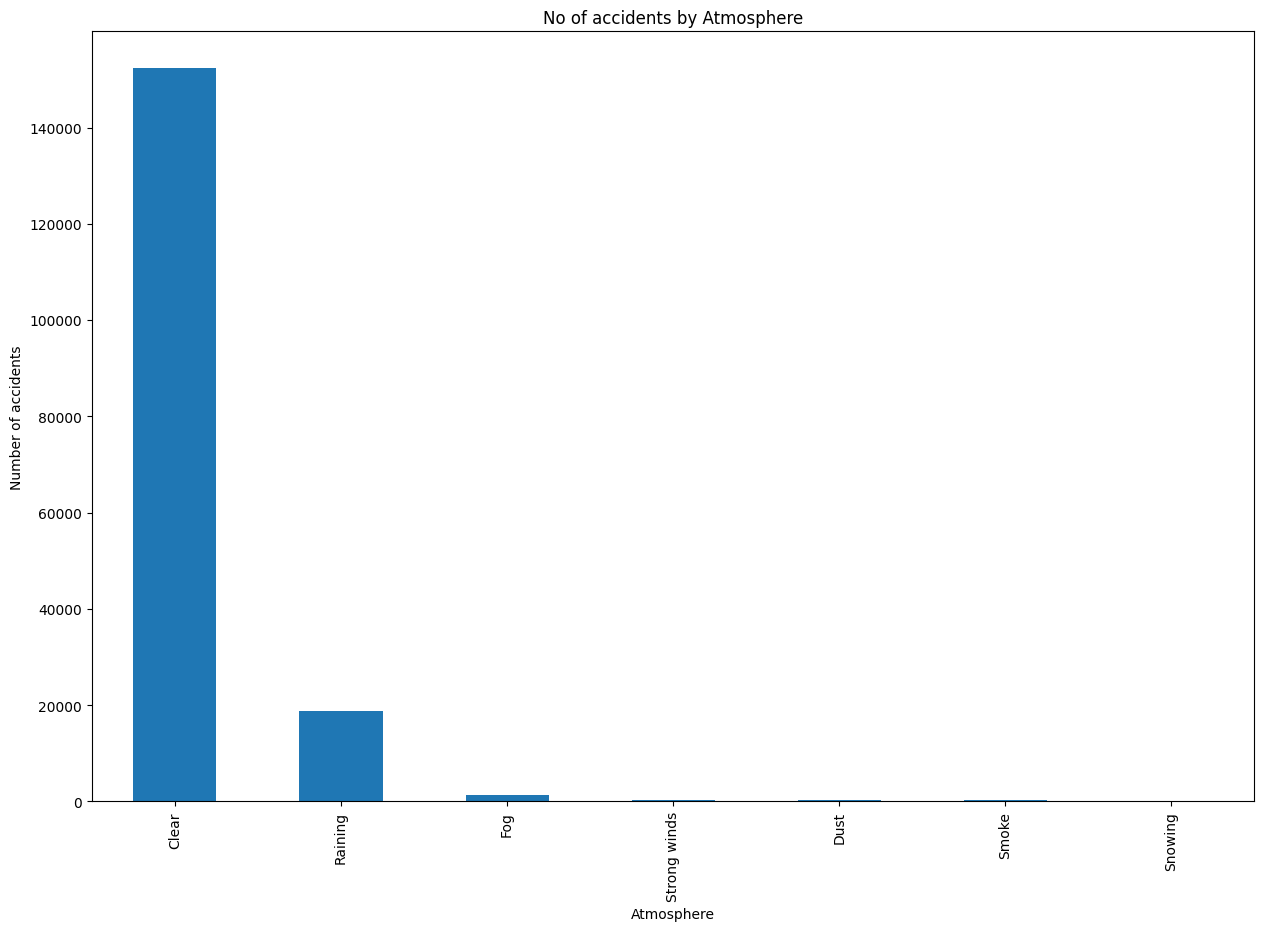

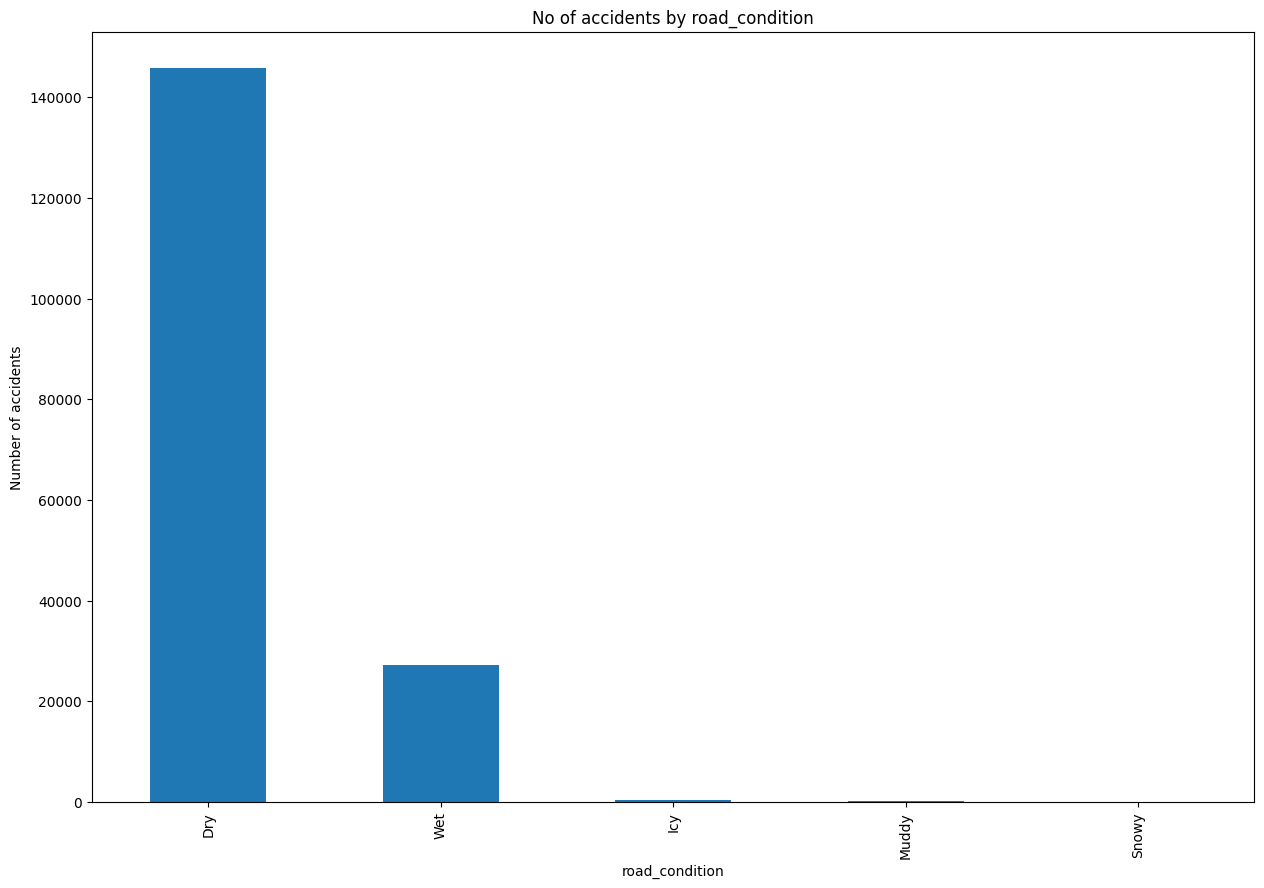

In [ ]:
cate = categorical[1:]
cate.remove('DCA')
for i in cate:
  plt.figure(figsize = (15,10))
  data=df[i].value_counts().plot.bar()
  plt.title('No of accidents by' + ' ' + i)
  plt.ylabel('Number of accidents')
  plt.xlabel(i)

plt.show

In [ ]:
for i in cate:
  print(df[i].value_counts(),'\n')

Collision with vehicle               109563
Collision with a fixed object         29724
Struck Pedestrian                     15870
Vehicle overturned (no collision)      7332
No collision and no object struck      6820
Struck animal                          1516
collision with some other object       1266
Fall from or in moving vehicle         1178
Other accident                           81
Name: type, dtype: int64 

Friday       27536
Thursday     26469
Wednesday    25555
Tuesday      24824
Saturday     24307
Monday       23427
Sunday       21232
Name: dayofweek, dtype: int64 

130    26134
121    16220
110    12959
171    11759
113     8729
       ...  
118       28
193       16
161       12
117        8
125        2
Name: DCA_CODE, Length: 81, dtype: int64 

Day                       118431
Dark Street lights on      30600
Dusk/Dawn                  13839
Dark No street lights      10016
Dark Street lights off       464
Name: Brightness, dtype: int64 

Not at intersection      866

> So far, what we can confirm from these plots are out of 208476 record:
*  The majority of the accidents is a *`collision with vehicle`* (more than 50%)
*  The distribution spread out during the week so the number of accidents in each day of the week shows no big differences, but most of them happen on a *`Friday`*
*  Although there are many **DCA_CODE**, the most frequent code are *`130`*, which from the `describe()` output above we can see is *REAR END(VEHICLES IN SAME LANE)*. This shows that the majority of accidents happens when a vehicle hit another in the back while traonlling in the same lane, same direction. Thís can be the consequence from many driving mistakes which the main ones are `using phone while driving`, `fatigue driving`, `unfocused due to music or talking while driving` or ` don't keep a safe distance` with the car ahead
*  More than half the accidents happen during the day which if not taking the **Atmosphere** or **road condition** into account, can only be the result from carelessness from the drivers' part
*  About half of them happen not at an intersection, which should not be considered one of the most dangerous.
*  The majority of the accidents are actually categorised as *other*, only a very small protion are *fatal*
*  About 80% of the accidents happen on a *`clear`* day. This may seems strange but that is because we haven't taken **road_condition** into account yet and even on clear day, the previous day might rain or snow which lead to the road not being ideal for driving safely. Moreover, poeple also tend to be more cautious on day of extreme weather
* Also about 80% of the accidents happen on a *`dry`* road, the low number on other condition might be for them same reason mentioned above, that people tend to be more cautious when there are noticable difficulties on the road due to  

Next, we are to look at the trends of each accident types over the years


type  Collision with a fixed object  Collision with vehicle  \
date                                                          
2006                           2328                    7555   
2007                           2286                    7517   
2008                           2281                    7553   
2009                           2213                    7383   
2010                           2027                    7350   
2011                           2045                    7331   
2012                           1941                    7506   
2013                           1937                    7451   
2014                           2028                    7749   
2015                           2114                    8582   
2016                           2202                    8384   
2017                           1912                    7364   
2018                           1783                    7031   
2019                           1777                    

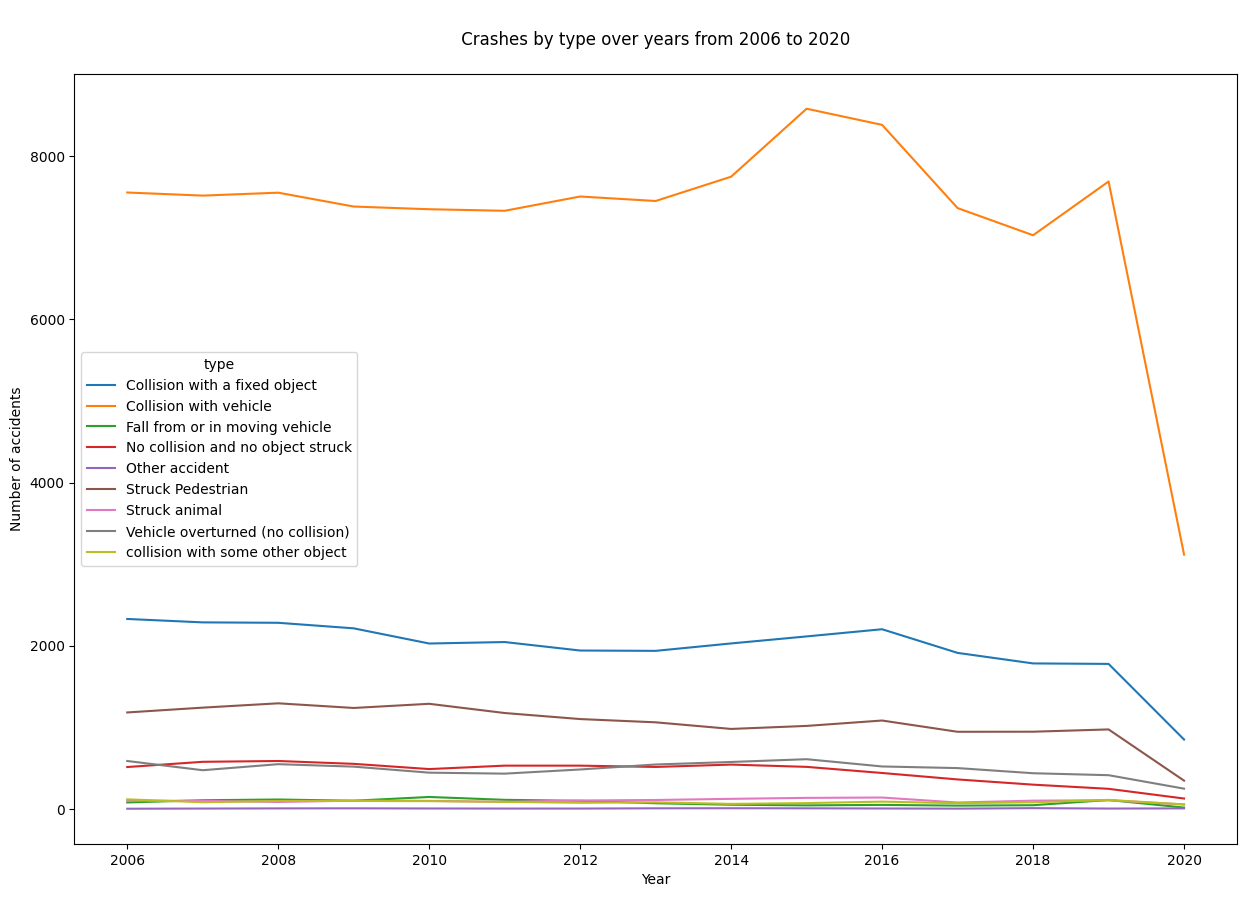

In [ ]:
df_type_yr = df.groupby([yr,'type'])['acc_id'].count().unstack()
df_type_yr.plot.line(figsize=(15,10))
print(df_type_yr,'\n')
plt.title('\n Crashes by type over years from 2006 to 2020 \n')
plt.ylabel('Number of accidents')
plt.xlabel('Year')
plt.show()

> We can see *Collision with vehicle* is a dominat crash type, followed by *Collision with a fixed Object* and *Struck Pedestrian*.

> *collision with ome other object*,*Fall from or in moving vehicle* and *Other accidents* are the least cases that happens. while the first 2 appaers to have around 100-200 each year, *Other accidents* have almost none compare to the rest (less than 10 over all 15 years

Now Let's observe the changing rate of the Number of accidents after 14 years

In [ ]:
acc_no_06 = df[df['date'].dt.year == 2006 ].groupby('type')['acc_id'].count()
acc_no_20 = df[df['date'].dt.year == 2020 ].groupby('type')['acc_id'].count()

rate = ((acc_no_20 - acc_no_06)/acc_no_06)*100
print(rate)

type
Collision with a fixed object        -63.487973
Collision with vehicle               -58.742555
Fall from or in moving vehicle       -79.746835
No collision and no object struck    -75.243665
Other accident                       200.000000
Struck Pedestrian                    -70.727580
Struck animal                        -46.534653
Vehicle overturned (no collision)    -57.751278
collision with some other object     -52.991453
Name: acc_id, dtype: float64


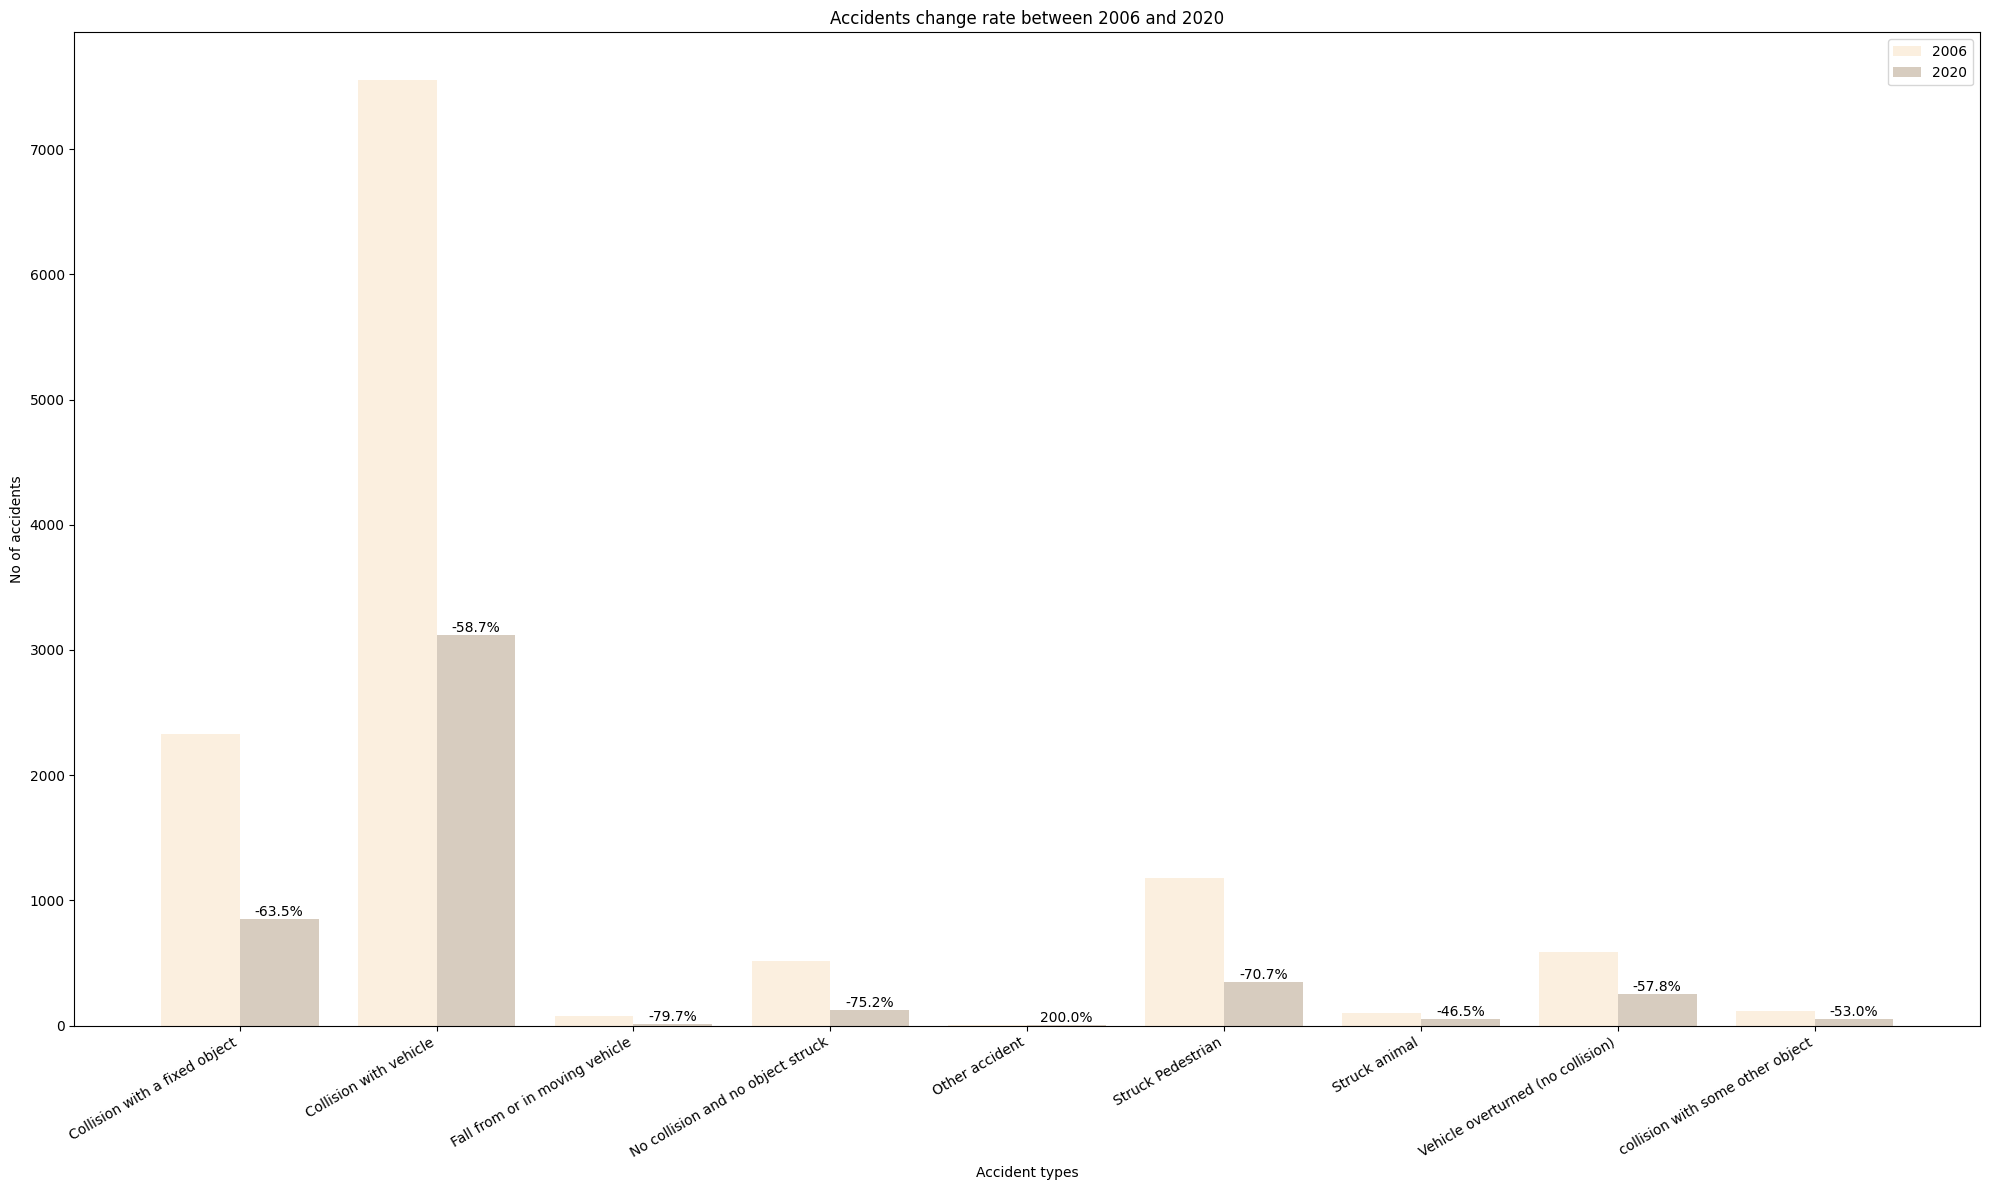

In [ ]:
acc_type = list(sorted(df['type'].unique()))
bar_width = 0.4
index = np.arange(len(acc_type))

fig, ax = plt.subplots(figsize=(20, 12))
bar1 = ax.bar(index, acc_no_06, bar_width, label='2006',alpha = 0.8, color='#FAEBD7')
bar2 = ax.bar(index + bar_width, acc_no_20, bar_width, label='2020',alpha = 0.8, color ='#CDC0B0')

for i, (bar, change) in enumerate(zip(bar2, rate)):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{change:.1f}%', ha='center', va='bottom', color='black')

ax.set_xlabel('Accident types')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('No of accidents')
ax.set_title('Accidents change rate between 2006 and 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(acc_type)
ax.legend()

plt.tight_layout()
plt.show()

> The graph show that:
*  Beside *Other accident**, all other type of accidents decrease with rate vary from 48.4% to 77.9%
*  While having the largest number, **Collison with vvehicle** actually has one of the least decrease rates
*  **Other accident** is the only one that increase and with the biggest rate at that (250%). But as the count of this value is already very small, this big change actually doesn't mean much in the analysis


Now, let's try and see the **SEVERITY** of these accidents by **type**

SEVERITY                           Fatal  other  serious
type                                                    
Collision with a fixed object       1237  14629    13858
Collision with vehicle              1468  74634    33461
Fall from or in moving vehicle        15    632      531
No collision and no object struck     41   4167     2612
Other accident                         1     50       30
Struck Pedestrian                    555   8455     6860
Struck animal                         19    997      500
Vehicle overturned (no collision)    128   4228     2976
collision with some other object      17    813      436 



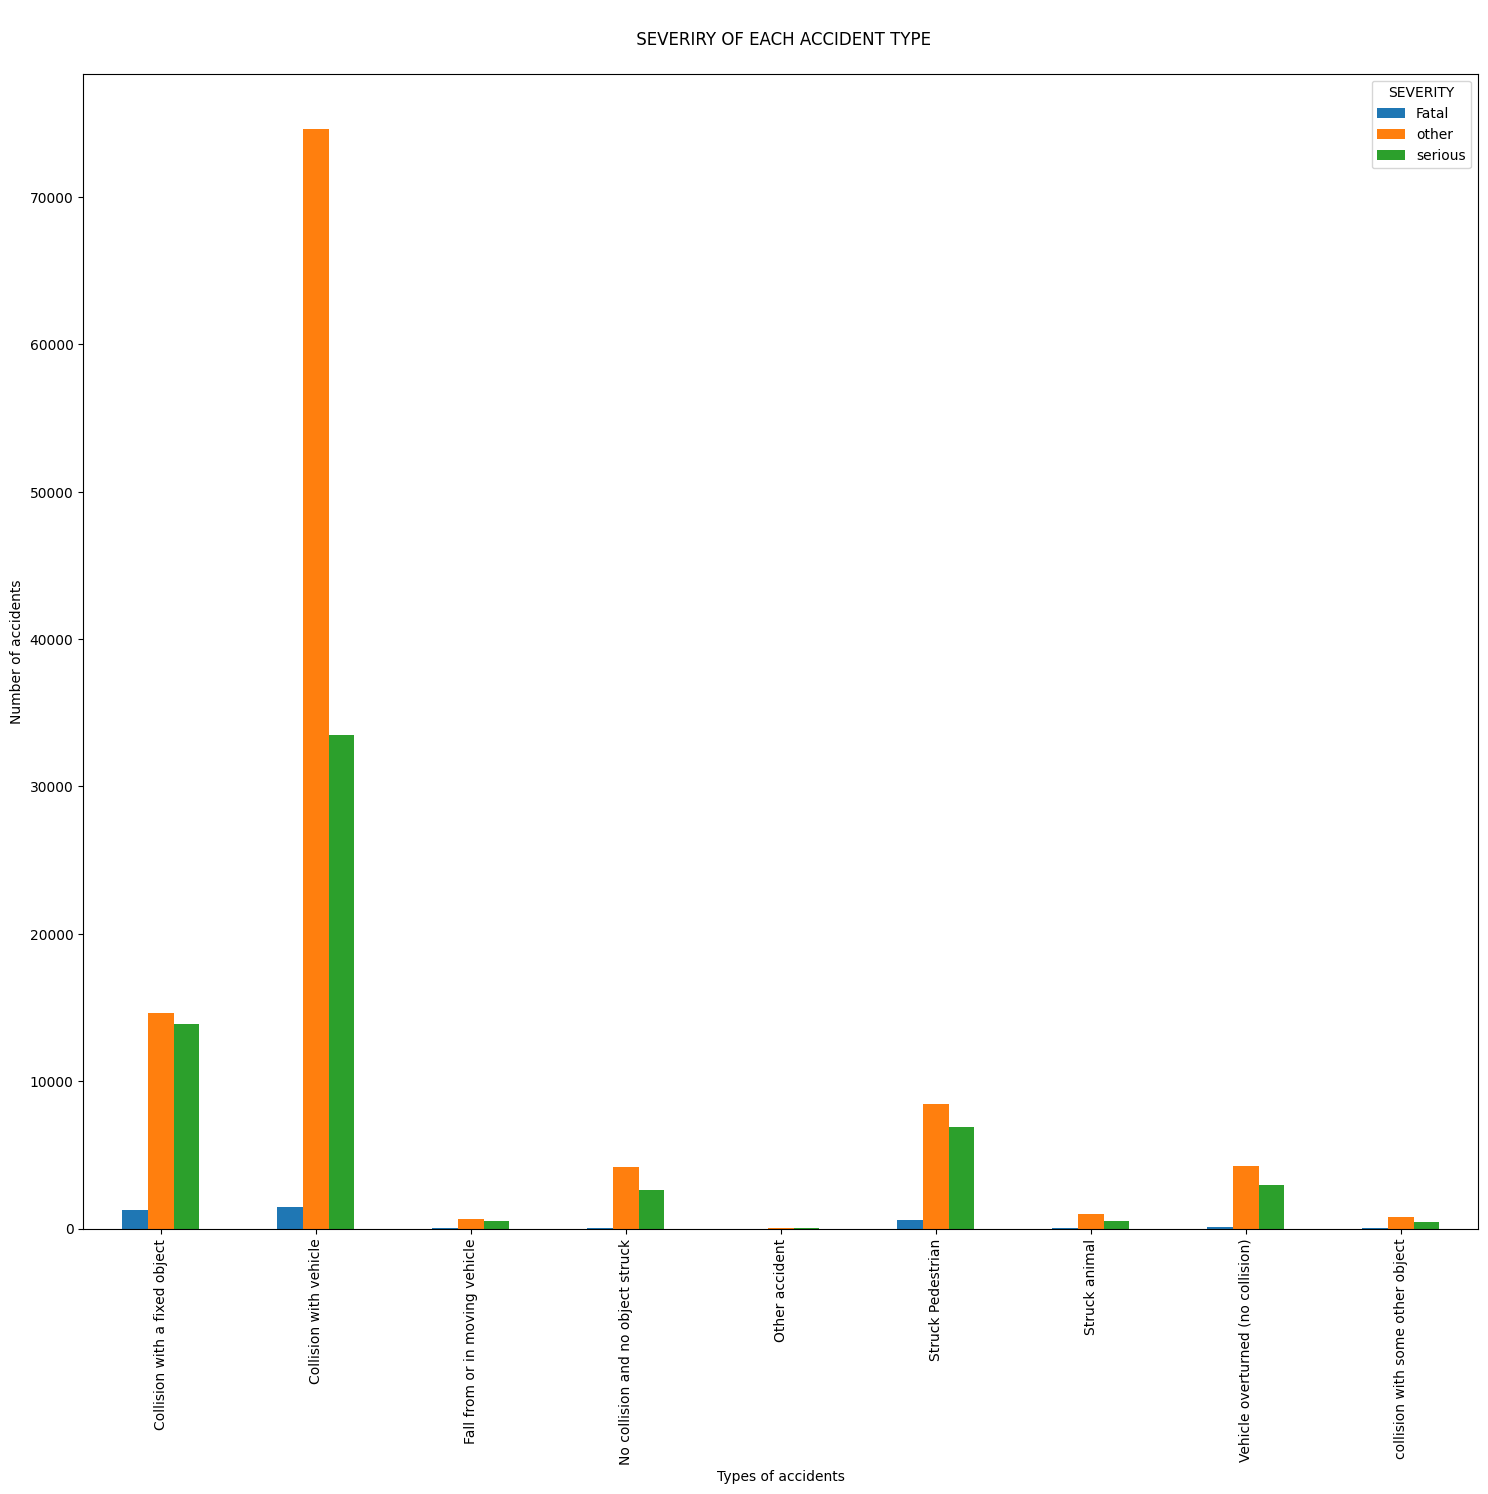

In [ ]:
df_sever = df.groupby(['type','SEVERITY'])['acc_id'].count().unstack()
print(df_sever,'\n')
df_sever.plot.bar(figsize=(18,15))
plt.title('\n SEVERIRY OF EACH ACCIDENT TYPE\n')
plt.ylabel('Number of accidents')
plt.xlabel('Types of accidents')
plt.show()

> Since *`Collision with vehicle`* have an overwhelming large number, the number for each **SEVERITY** level is also the highest.

> However, the number of *`fatal`* accidents for *`Collision with a fixed object`* is actually almosst the same as for that of *`Collision with vehicle`*. This can be because as we find out before, most of the accidents are *`REAR END`*, crash with vehicle in the same lane travelling in same direction, that might somewhat lessen the force of impact andvthe vehicle's safety features like airbag will be deploy. As for with fixed object, people tend to avoid head on collision which can reduce the chance of deploying the airbag. Moreover, during impact, the car my slow down (or can rotate) while the driver body still move at the same speed causing the driver to collide with other part inside the car other than the airbag. These can be the reasons why the *`Collision with a fixed object`* can be more fatal as *`Collision with vehicle`* since it has similar number of *`fatal`* accident while having much less total number.

> All the other **type** of accidents share the same pattern, most are consider as *`other`*, which mean there are probably no human casualty, then around half or more of it are *`serious`*, and the rest, the smallest number, belong to the *`fatal`* accidents.

That finalised the analysis with categorical data, now we move on to the numerical ones

### 2.ANALYSING NUMERICAL DATA

In [ ]:
for i in seq:
  numeric.remove(i)


In [ ]:
print(numeric)

['date', 'vehicle_no', 'person_no', 'injured_no', 'death', 'uninjured_no', 'SPEED_ZONE']


In [ ]:
df_no = df[numeric[:-1]].groupby(yr).sum()
print(df_no)


      vehicle_no  person_no  injured_no  death  uninjured_no
date                                                        
2006       22029      31031       16409    323         14312
2007       21996      31228       16334    310         14599
2008       22283      31178       16393    289         14500
2009       21535      30107       15874    281         13954
2010       21322      29833       15653    276         13908
2011       21208      29145       15243    270         13636
2012       21547      29240       15121    271         13849
2013       21301      28650       14906    230         13518
2014       22149      29871       15352    234         14284
2015       24270      32392       16411    237         15730
2016       23783      31547       16325    259         14958
2017       20873      27918       14392    242         13281
2018       19893      26380       13581    196         12591
2019       21413      28163       14673    238         13217
2020        8744      11

<ipython-input-60-dff96a44004f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_no = df[numeric[:-1]].groupby(yr).sum()


Text(0, 0.5, 'Count')

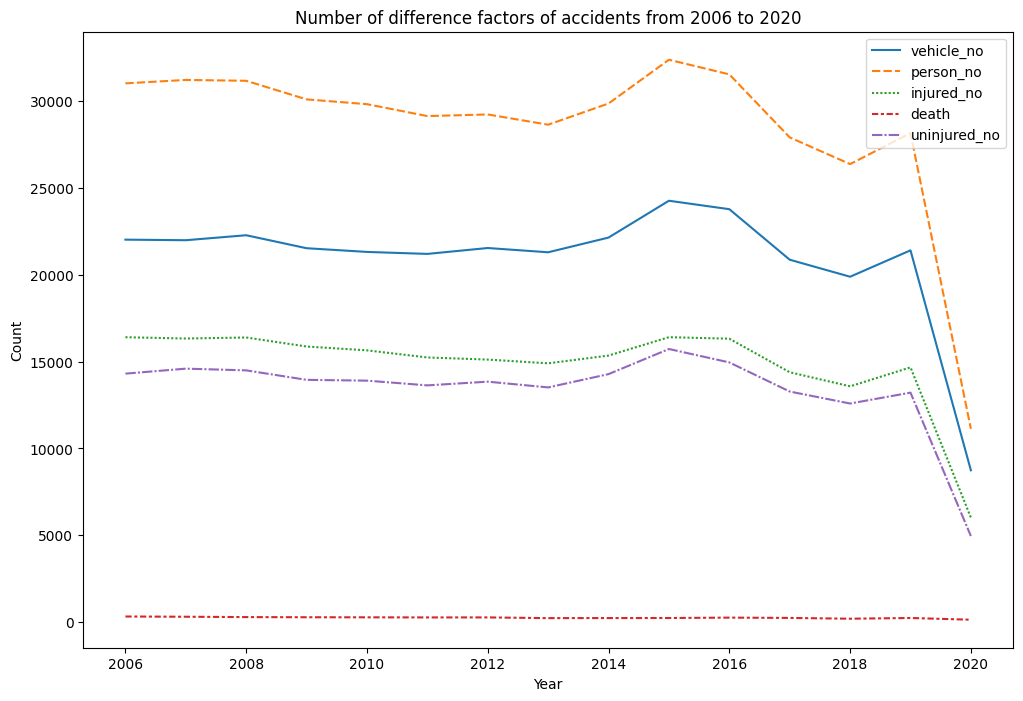

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_no)
plt.title('Number of difference factors of accidents from 2006 to 2020')
plt.xlabel('Year')
plt.ylabel("Count")

> the output present that:
* The number of **death** are actually very small compare to all the others
* all the others variable have the same pattern: they start at a certain point in 2006, slightly increase or decrease over the years untill 2013 and start to increase strongly till 2015, then they gradually decrease till 2018, by the year 2019, they increse again before drastically drop in 2020

> this show us that **vehicle_no**, **person_no**, **injured_no**, **death**, **uninjured_no** seems to be correlated

> As for the big fall in number in 2020, it must be for the same reason as the number of accidents since 2019-2020 is the start of the global crisis COVID-19.


<ipython-input-62-cee8d9d8a088>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[numeric].corr(), cmap ='Greens', annot= True)


<Axes: >

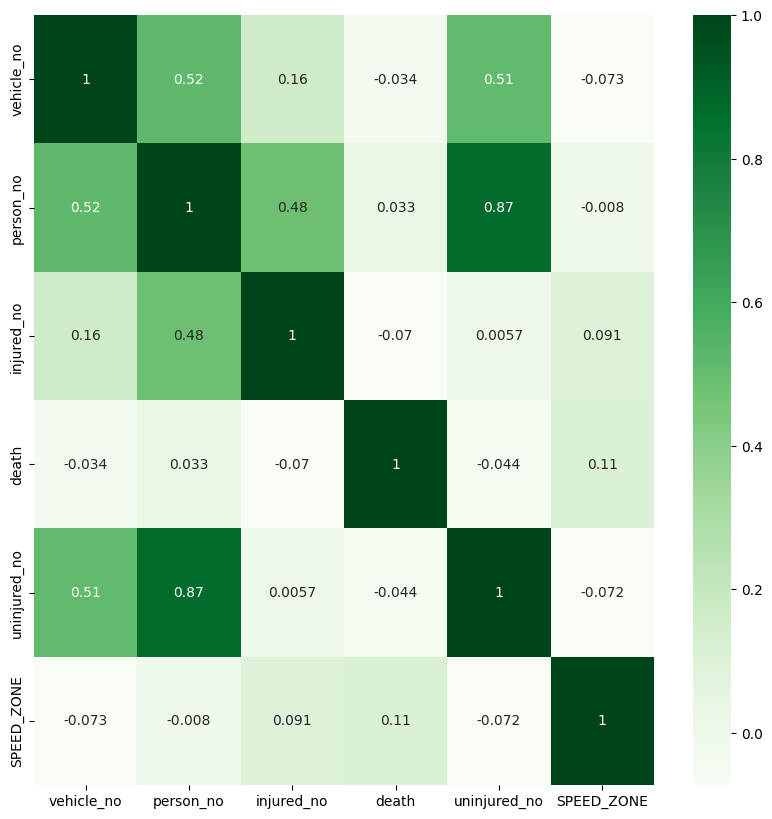

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df[numeric].corr(), cmap ='Greens', annot= True)


> the highlight from this graphs are:
*  **person_no** have a decent positive correaltion with **injured no**, this shows that whne there's more people got invole in an accident, there seems to be more people that got injured
*  The sane thing happen for **person_no** and **uninjured_no**
*  However, the correlation of **person_no** with **uninjured_no** are a lot higher than with **injured no**, this probably means when accident happen, with more number of people involved, number of uninjured poeple seems to be higher than injured one.

Let's check that out


In [ ]:
inj_rate = round(df_no['injured_no']/df_no['person_no'],3)
unin_rate = round(df_no['uninjured_no']/df_no['person_no'],3)
death_rate = round(df_no['death']/df_no['person_no'],3)

casualty = pd.concat([df_no['person_no'],inj_rate,unin_rate,death_rate], axis = 1)
casualty.columns
casualty.rename(columns = {0:'Injured rate',1:'Uninjured_rate',2:'death_rate'})

,person_no,Injured rate,Uninjured_rate,death_rate
date,,,,
2006,31031,0.529,0.461,0.010
2007,31228,0.523,0.467,0.010
2008,31178,0.526,0.465,0.009
2009,30107,0.527,0.463,0.009
2010,29833,0.525,0.466,0.009
2011,29145,0.523,0.468,0.009
2012,29240,0.517,0.474,0.009
2013,28650,0.520,0.472,0.008
2014,29871,0.514,0.478,0.008


> This show that over years, about more than half of the people involved in an accidents got injured, even in 2020 when there are signijicantly less accidents, and the rate of death is around 1%.

> This pattenr is very consitent and does support the conclusion that the more than half the time people get into an accidents, it can lead to injury or even fatal

Previously, we found out that there are extreme case for number of people involved, injured or death, so now we can start looking into that

In [ ]:
df[numeric].describe()

,vehicle_no,person_no,injured_no,death,uninjured_no,SPEED_ZONE
count,173350.000000,173350.000000,173350.000000,173350.000000,173350.000000,173350.000000
mean,1.813360,2.467915,1.284621,0.021886,1.161206,68.101904
std,0.760368,1.554764,0.751304,0.163623,1.360640,18.192734
min,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,60.000000
50%,2.000000,2.000000,1.000000,0.000000,1.000000,60.000000
75%,2.000000,3.000000,1.000000,0.000000,2.000000,80.000000
max,21.000000,97.000000,45.000000,11.000000,87.000000,110.000000


Looking at the statistic again, we can see that 75% of these number are very small while the max is overwhelmingly big. so we can check all the case where they are higher than the value of 75%

In [ ]:
for i in df_no.columns:
  print('extreme value count of',i,':', df[i][df[i] > df[i].quantile(0.75)].value_counts(),'\n')


extreme value count of vehicle_no : 3     14882
4      3603
5       970
6       219
7        70
8        29
9        13
10       12
11        3
13        2
12        2
19        1
14        1
21        1
Name: vehicle_no, dtype: int64 

extreme value count of person_no : 4     14079
5      7275
6      3553
7      1607
8       810
9       392
10      200
11      112
12       65
13       46
14       29
15       14
16       13
17       12
21        9
20        5
19        5
22        5
48        4
35        4
18        4
29        3
23        3
27        3
38        3
41        2
28        2
25        2
32        2
50        2
31        1
37        1
45        1
67        1
40        1
89        1
24        1
33        1
54        1
51        1
97        1
Name: person_no, dtype: int64 

extreme value count of injured_no : 2     25476
3      6505
4      2145
5       832
6       294
7        95
8        50
9        19
10       18
13        5
11        5
12        4
14        3
17        2


> We can see that every once in a while, we got some cases that involves a lot more cars or people (up to 21 cars or 97 people) which must have lead to the big value for **injured_no**, mostly are under 25, with only 2 cases slightly higher and 1 extreme case that have 45 people injured.

> When there are fatal cases, about more than 90% of them only have 1 to 2 deaths, the higher number rarely happen and almost never get higher than 2 (approx. 40 in 180000)

> The number of **uninjured_no** are also pretty high

Let's check when the most extreme cases happens

In [ ]:
for i in df_no.columns:
  ex_df = df[df[i] == df[i].max()]
  print('Most extreme case(s) for', i , ':','\n')
  display(ex_df)
  print('\n')



Most extreme case(s) for vehicle_no : 



,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,Atmosphere,road_condition
144814,T20160000627,2016-10-01 11:38:00,Collision with vehicle,Sunday,133,LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES) ...,Day,21,28,1,0,27,Not at intersection,other,100,Clear,Dry




Most extreme case(s) for person_no : 



,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,Atmosphere,road_condition
109054,T20130018492,2013-07-09 09:25:00,Collision with vehicle,Saturday,192,STRUCK TRAIN,Day,2,97,10,0,87,Not at intersection,serious,100,Clear,Dry




Most extreme case(s) for injured_no : 



,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,Atmosphere,road_condition
194425,T20190012874,2019-11-07 02:05:00,Vehicle overturned (no collision),Thursday,174,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT) ...,Dark No street lights,2,51,45,1,5,Not at intersection,Fatal,100,Clear,Wet




Most extreme case(s) for death : 



,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,Atmosphere,road_condition
20031,T20070020494,2007-05-06 13:39:00,Collision with vehicle,Tuesday,192,STRUCK TRAIN,Day,2,38,27,11,0,Not at intersection,Fatal,100,Clear,Dry




Most extreme case(s) for uninjured_no : 



,acc_id,date,type,dayofweek,DCA_CODE,DCA,Brightness,vehicle_no,person_no,injured_no,death,uninjured_no,road_layout,SEVERITY,SPEED_ZONE,Atmosphere,road_condition
109054,T20130018492,2013-07-09 09:25:00,Collision with vehicle,Saturday,192,STRUCK TRAIN,Day,2,97,10,0,87,Not at intersection,serious,100,Clear,Dry
138088,T20150016376,2015-06-08 14:00:00,Collision with vehicle,Thursday,192,STRUCK TRAIN,Day,2,89,2,0,87,Not at intersection,serious,80,Clear,Dry


> Suprisingly, the accidents that has the most cars number only end up with 1 injured person. it is describe as lane side swipe in parralel, so this could possibly be because of *lost/unefficient steering wheel control* or *wheel allignment issue*  

> other extreme cases only have 2 vehicles involved, and from description, they are mostly *`STRUCK TRAIN`* accidents which we already knows hardly ever happen. The only exception is one with most **injured_no** which is a case of *`OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT)`* which happen on a wet day so it possibly because the driver lost control over the slippery road causethe accident. while the **injured_no** is very high, only 1 out of the 51 people in the accident die.

> Lunkily, among these cases, the death number remain very low except for 1 having the highest **death_no** which have the death rate of roughly 25% (11/38) and the rest of the people are injured.   

> most of them happen at daytime on a *`clear`* day with *`dry`* road and with the speed limit of *`100`*, which mean the cause are more likely from the vehicle or the drivers themselves.

Now Let's look on the speed factor of these accidents

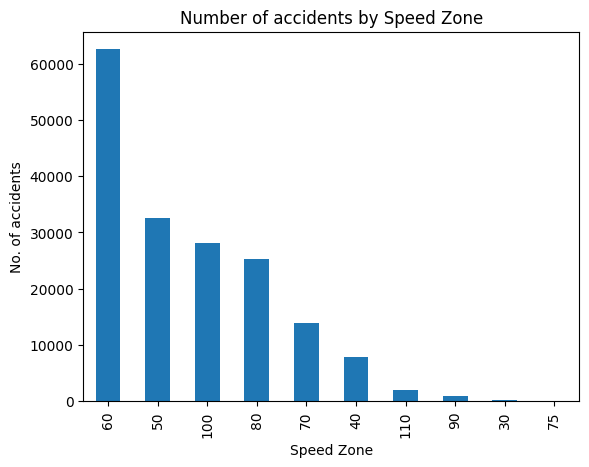

In [ ]:
df_speed = df['SPEED_ZONE'].value_counts()
df_speed.plot.bar()
plt.title('Number of accidents by Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('No. of accidents')
plt.show()

> Most of the accident happen on a *`60`* road, take about 30% of the total(60000+ / 180000+), almost double the speed zone of *`50`* with the 2nd highest number of accidents. Both zones are quite common and are usually used for smaller street or in residental area which are less spatious, some time even have parked car on the roads, which if the driver is not carefull or experienced enough can easily cause an accident. One more main reason can be speeding in these case

> Accidents happen least on *`75`* road, and then *`30`*, which are not very common in Australia


## III. CONCLUSION

1. The number of accidents have a downward trend from 2006 to 2013 then go up till 2015 and then gradually drop till 2020 including a drastically fall from 2019 to
2. Most of the accidents are collision between vehicles majority of which is with vehicles that are moving in same lane, same direction
3. Most of the accidents happen during daytime, with a clear sky or dry road surface which seems to show that the main reason causing crash is actually psychological as people tend to driver more carefully in the appearance of extreme wedifficulties on the road and drive more rashly when there are none
4. all type of accidents give similar statistical result: half or more being considered serious, while the majority of them doesn't have significant damage and are categorized as other, the rest being fatal. However, collision with fixed object seem to be more deadly than with other vehicle
5. The casualty rate for all accident type are also similar: about 51-54% of the people involved in an accident will got injured, 1% or less could receive fatal injury, and the rest are unharmed
6. Most accidents occur on smaller road or residential area in a 50 or 60 speed zone which can be due to lack of space, speeding or carelessness from the driver.